In [1]:
from numpy import*
from scipy import*
from scipy.integrate import*
from pylab import*

from JSAnimation import IPython_display
from JSAnimation.IPython_display import display_animation
from matplotlib import animation #mayabi es otra además de matplot, pero no funciona en el notebook

%matplotlib inline

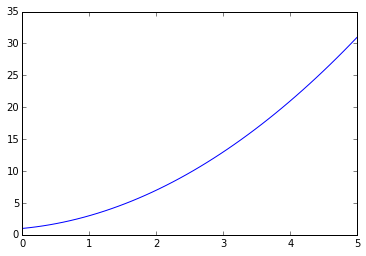

In [2]:
x = linspace(0,5)
y = x**2 + x + 1
plot(x,y)


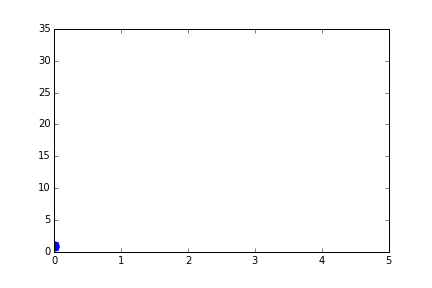
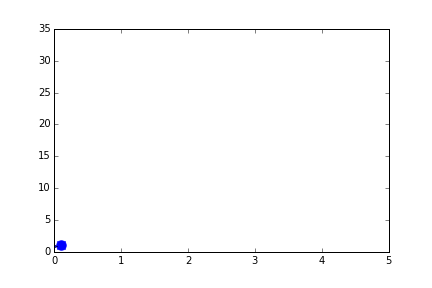
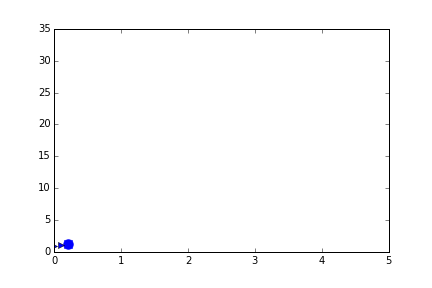
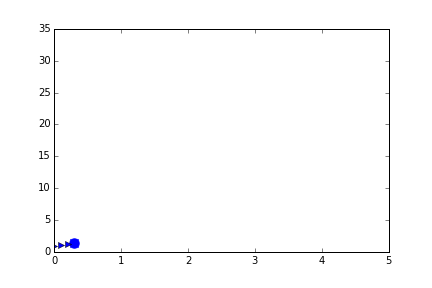
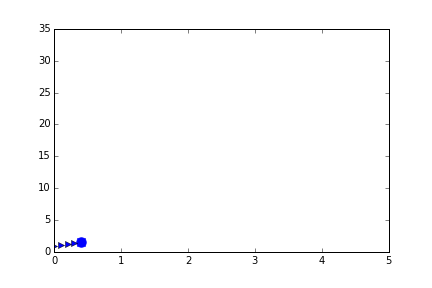
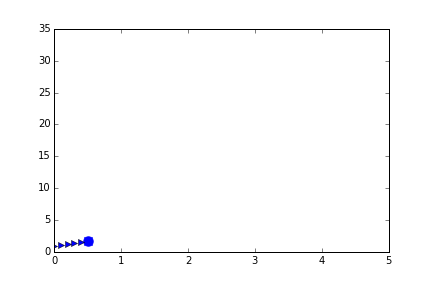
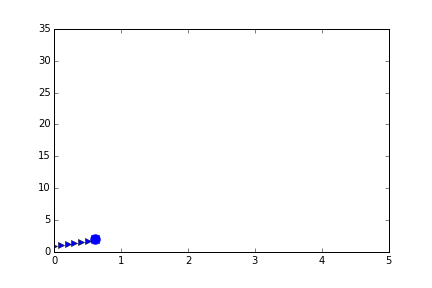
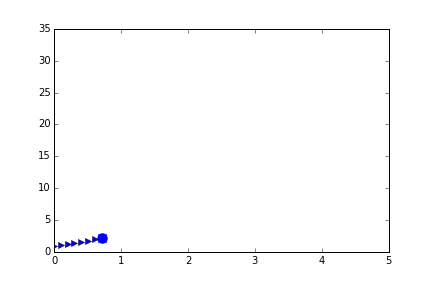
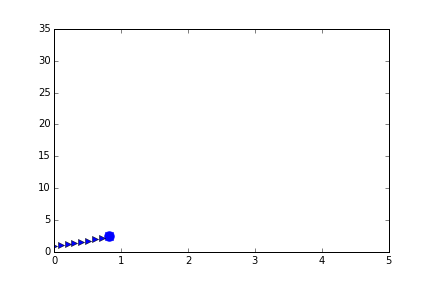
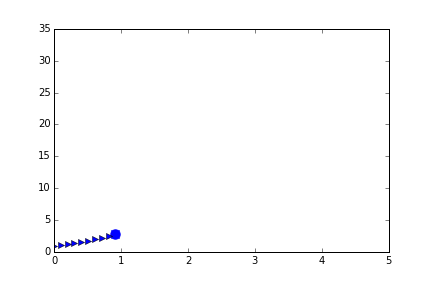
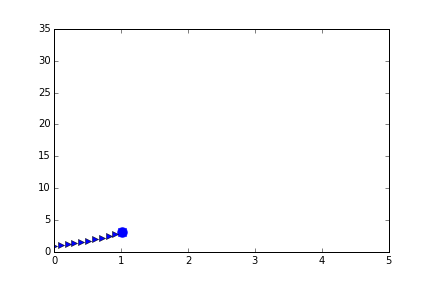
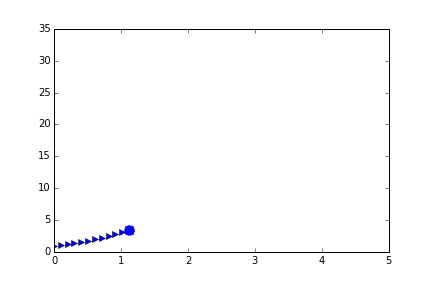
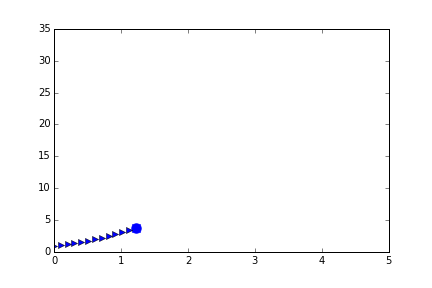
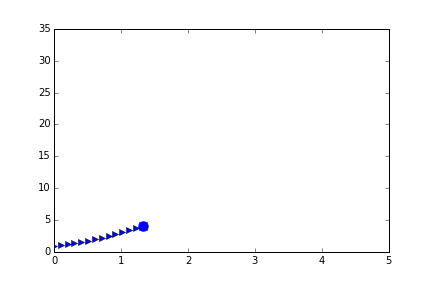
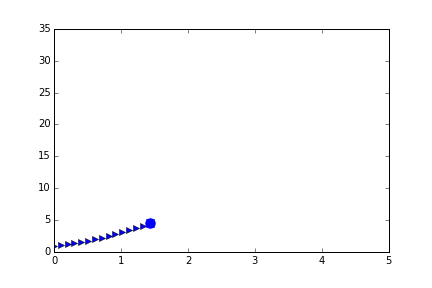
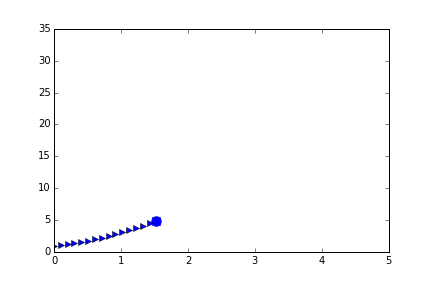
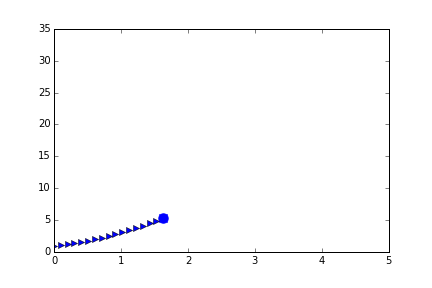
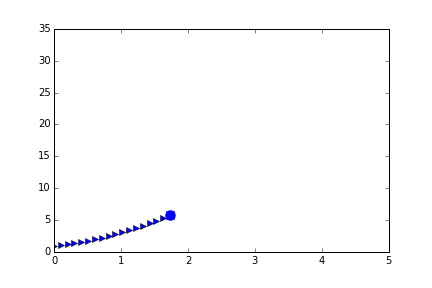
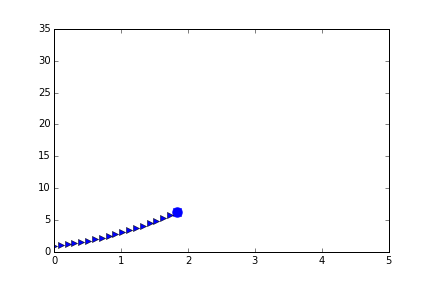
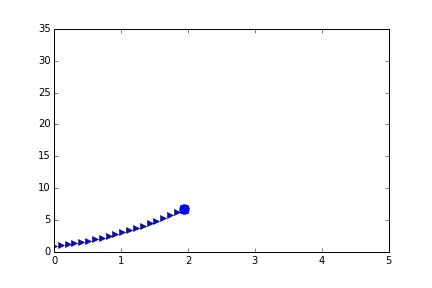
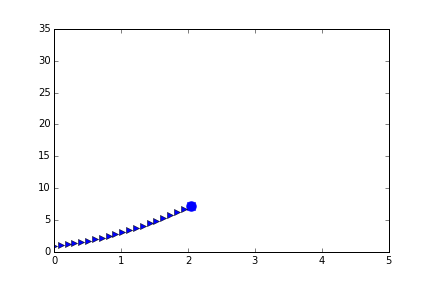
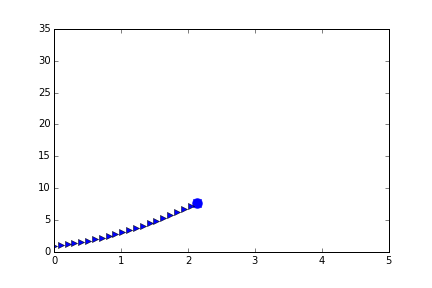
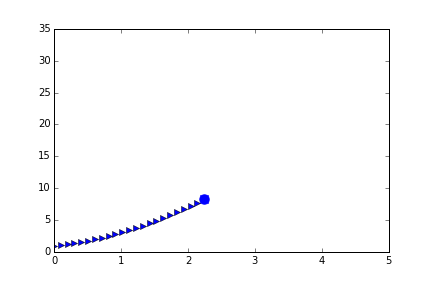
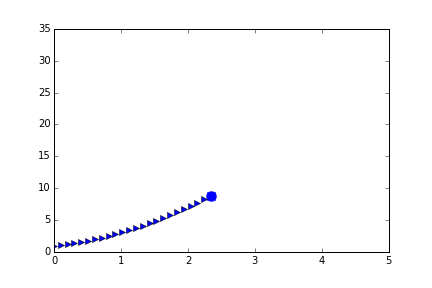
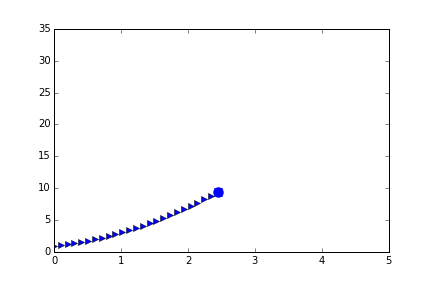
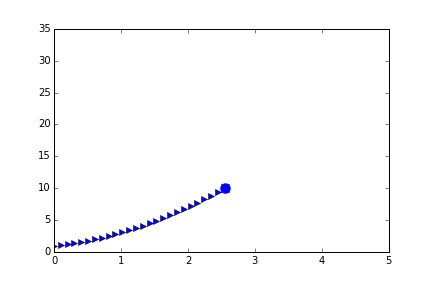
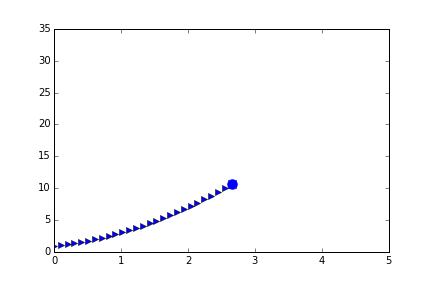
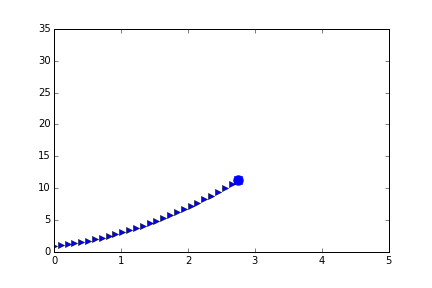
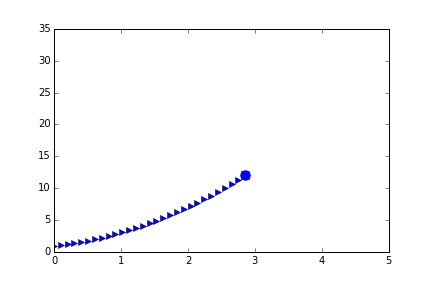
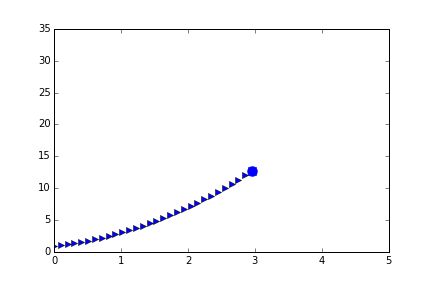
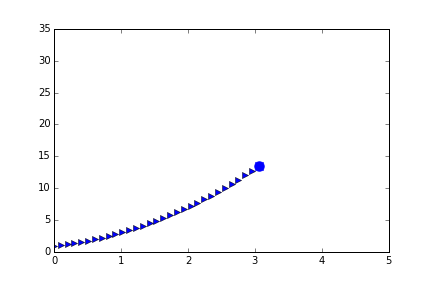
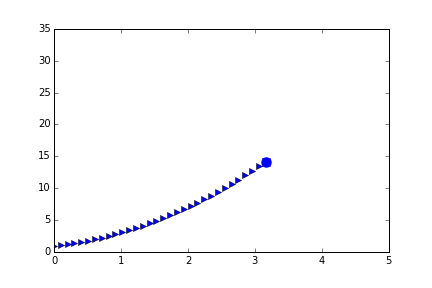
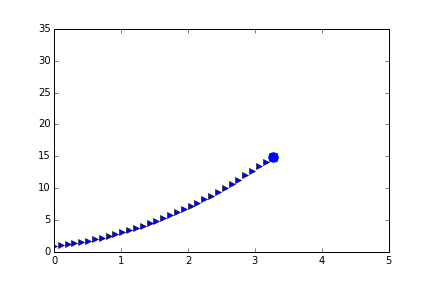
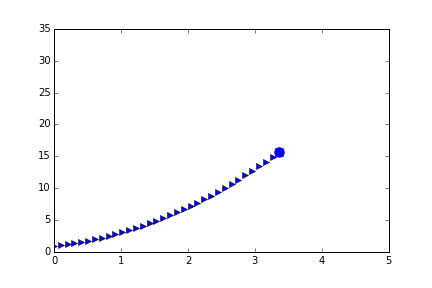
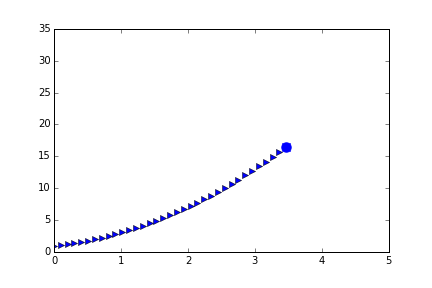
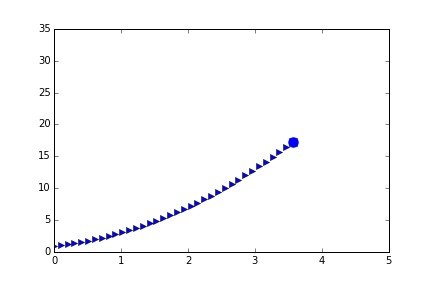
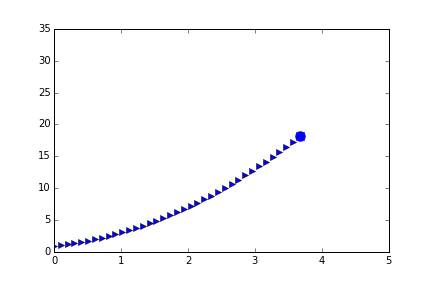
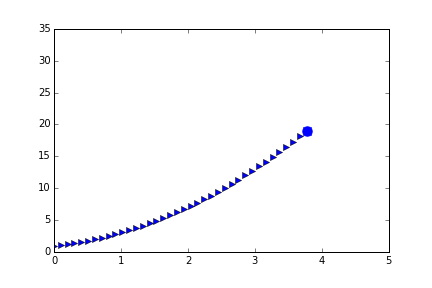
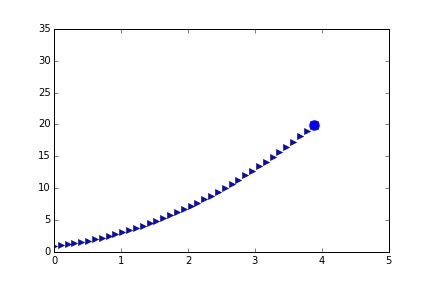
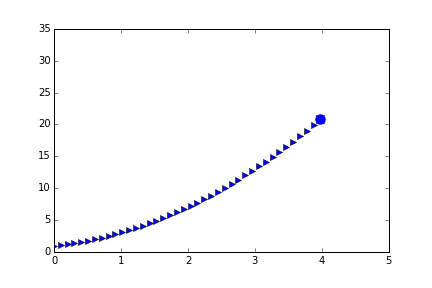
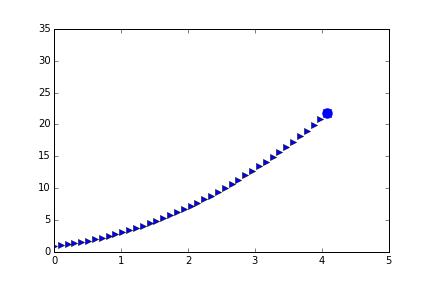
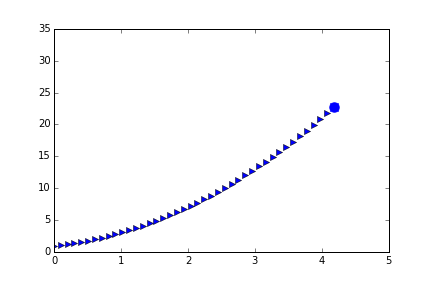
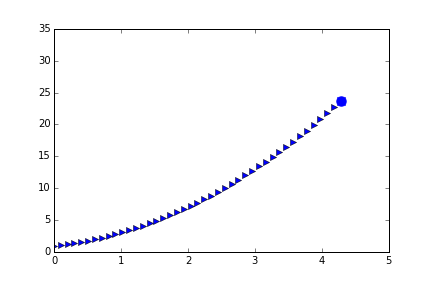
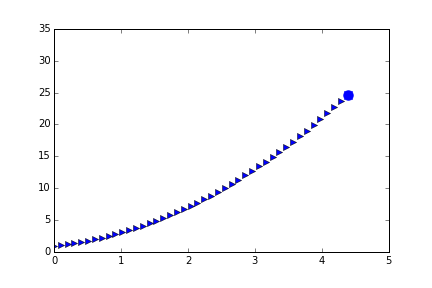
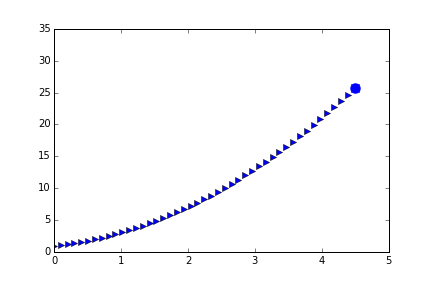
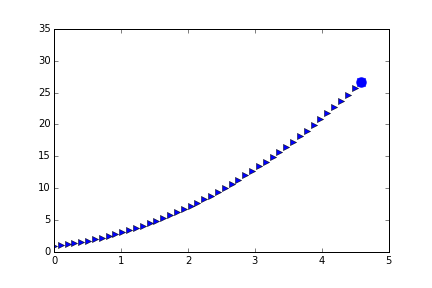
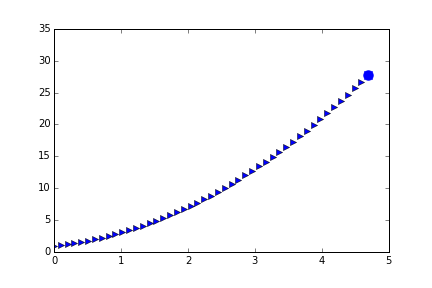
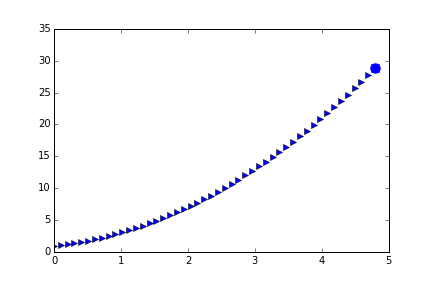
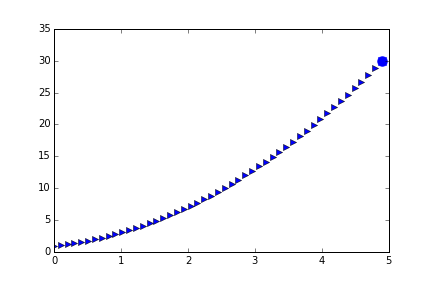
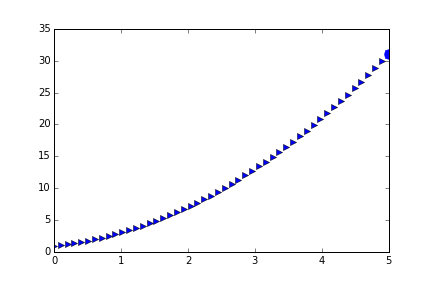

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(0,5),ylim=(0,35))
particle, = ax.plot( [] , [] , 'b.',markersize = 20 ) #b es de blue, . es de punto
#print type(particula)
line, = ax.plot ( [] , [] , '>' ) # ., --, -,-.,-*,-0,-1 2 3, -> , -<

def init(): #Toda animación que usemos con JSAnimation debe tener dos funciones, una que sea la inicial y otra que se itera.
    particle.set_data( [], [] )
    line.set_data( [] , [] )
    return particle, line,

def anima(i):
    particle.set_data( x[i], y[i] ) #necesita un índice, para recorrerse sobre los índices usados antes
    line.set_data( x[:i] , y[:i] )
    return particle, line,

animacion = animation.FuncAnimation(fig,anima,init_func=init,frames=len(x),interval=40,blit=True)
#debe tener todos estos argumentos, el intervalo es en ms

display_animation(animacion)


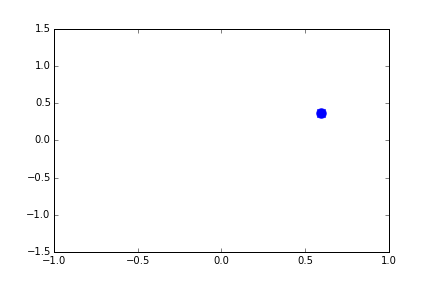
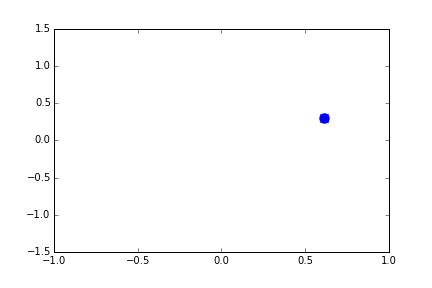
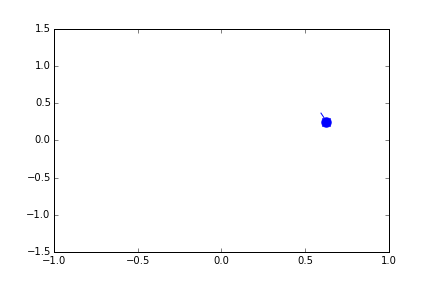
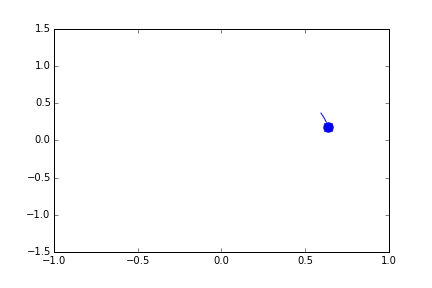
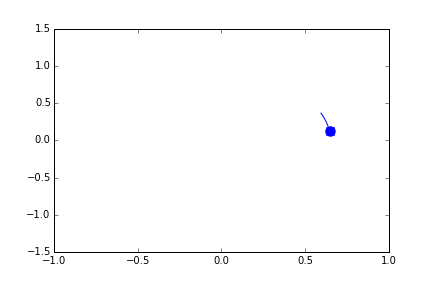
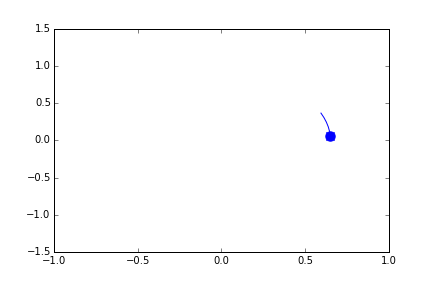
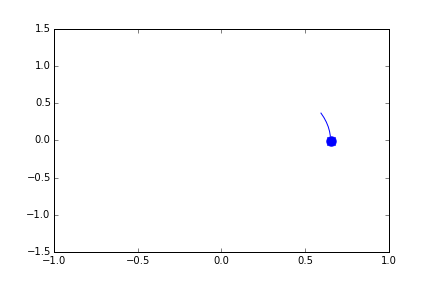
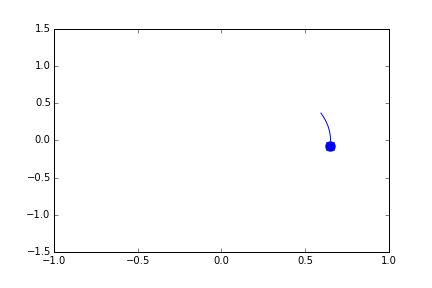
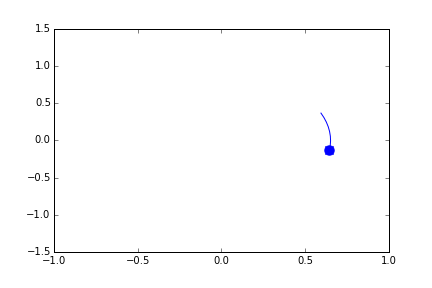
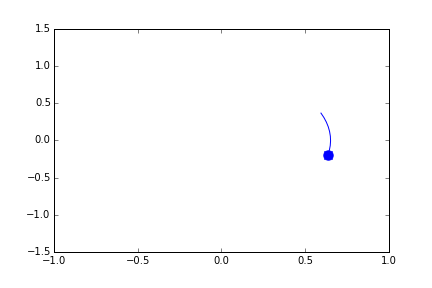
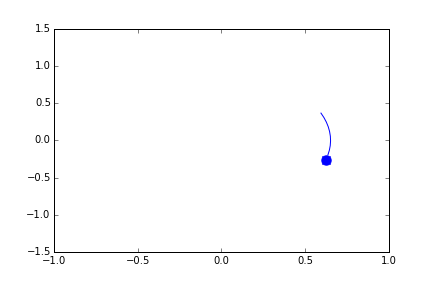
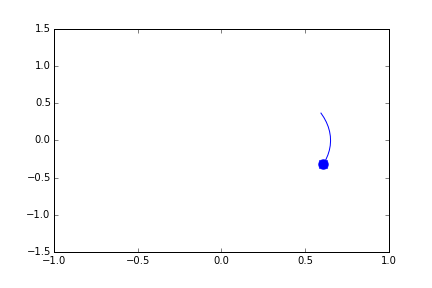
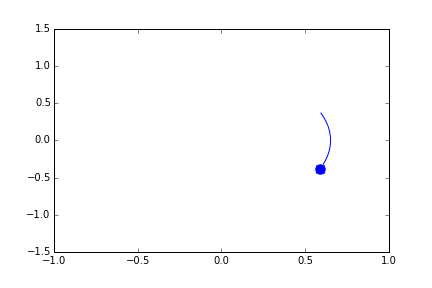
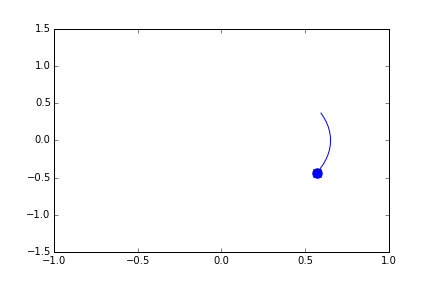
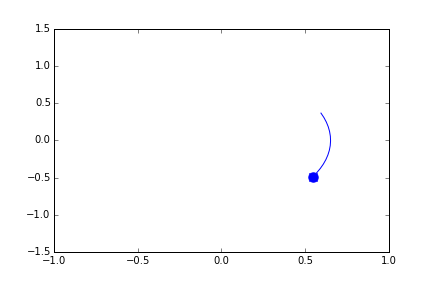
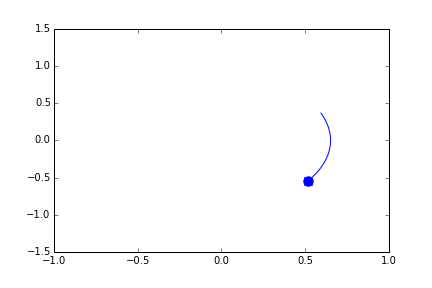
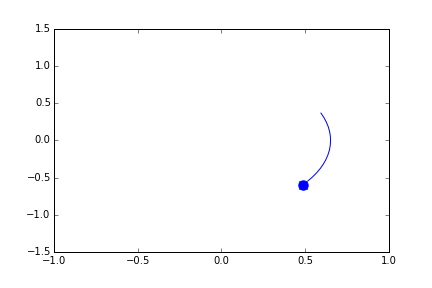
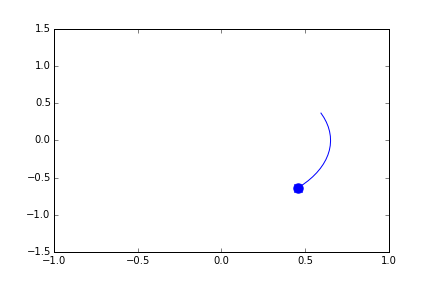
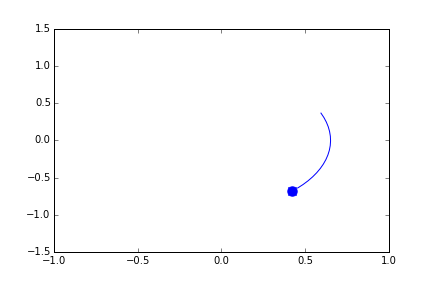
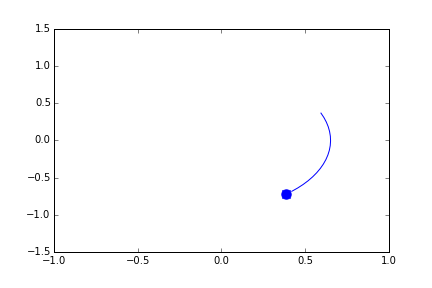
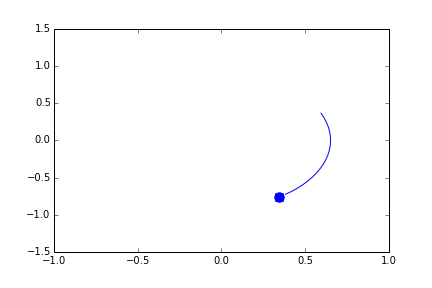
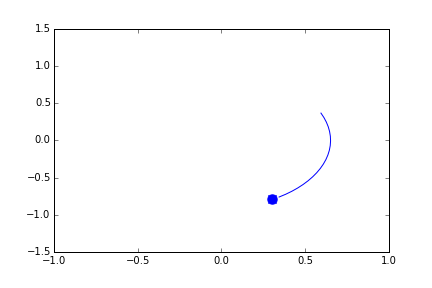
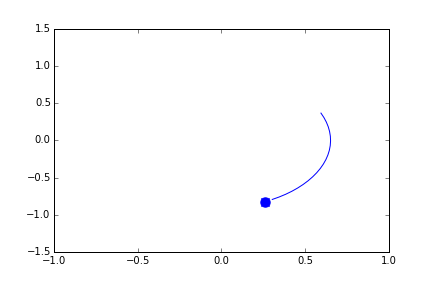
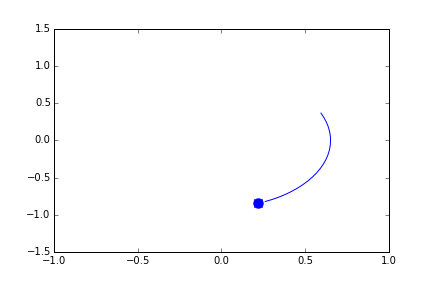
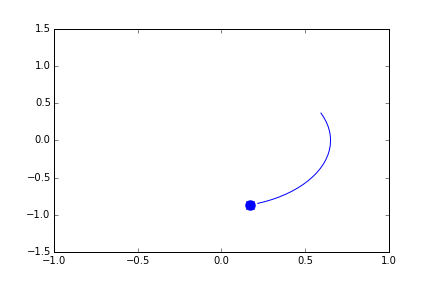
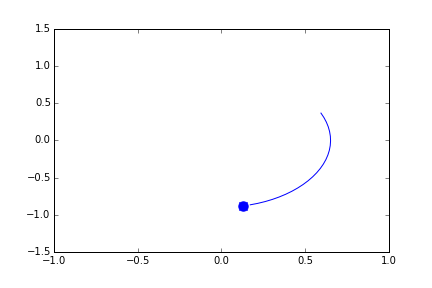
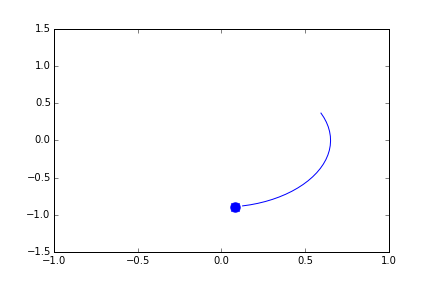
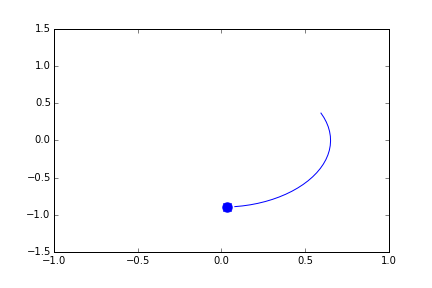
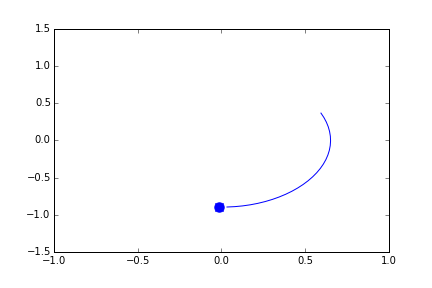
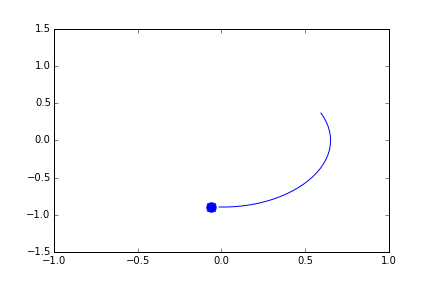
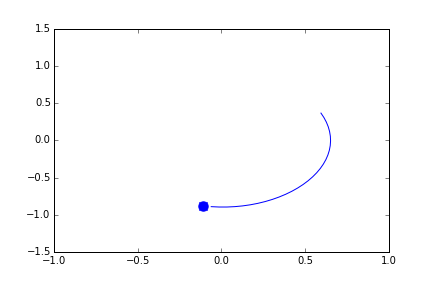
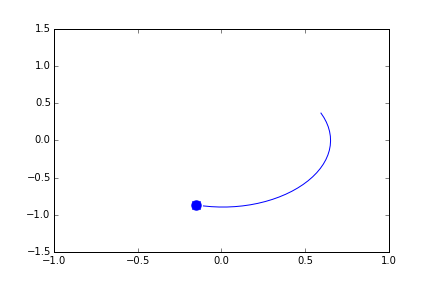
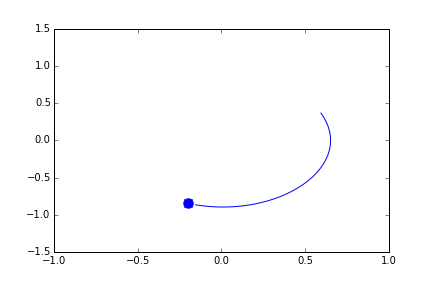
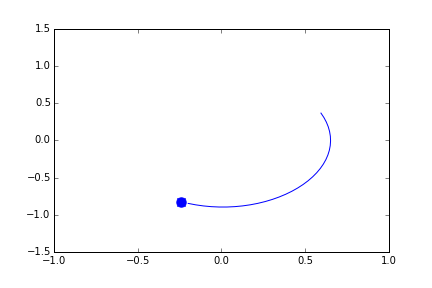
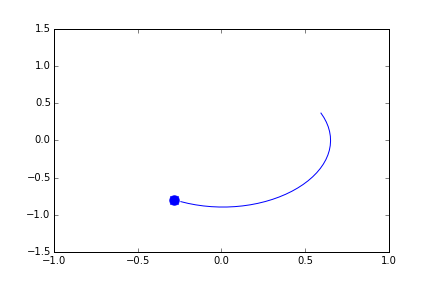
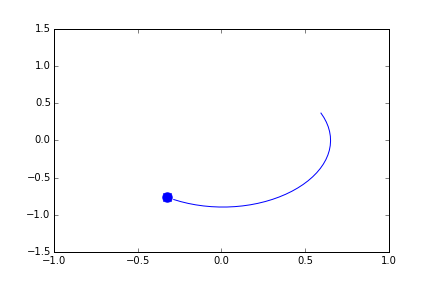
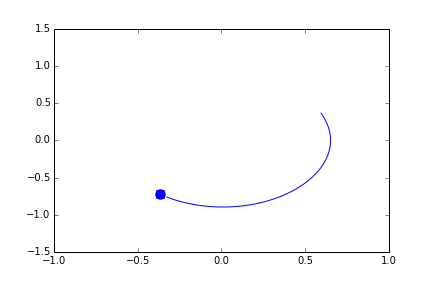
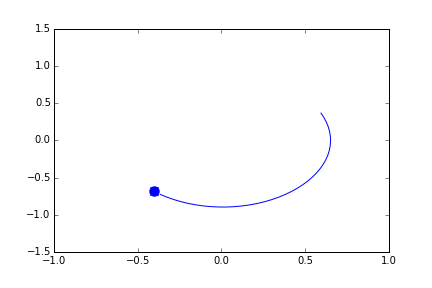
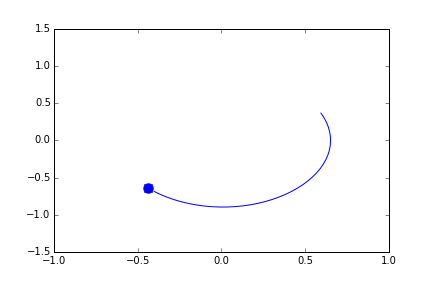
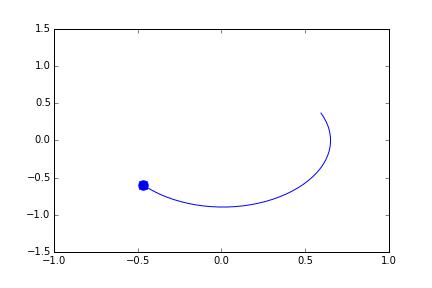
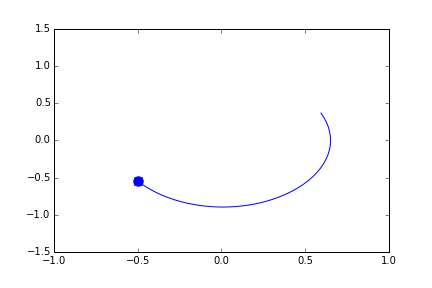
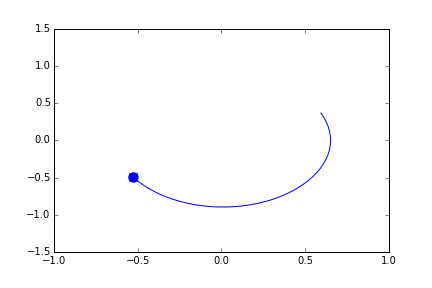
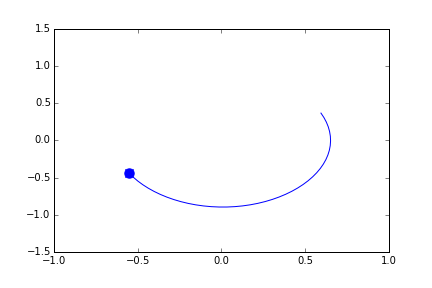
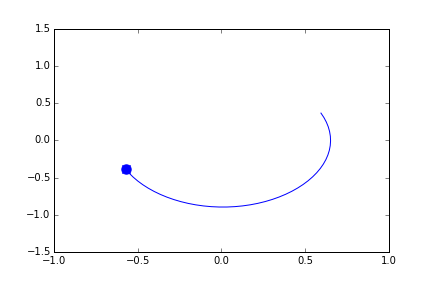
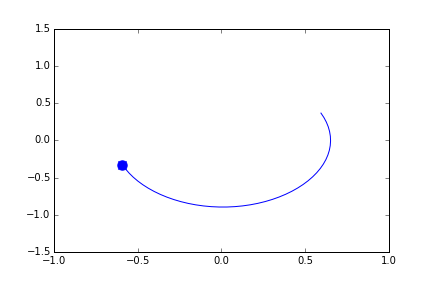
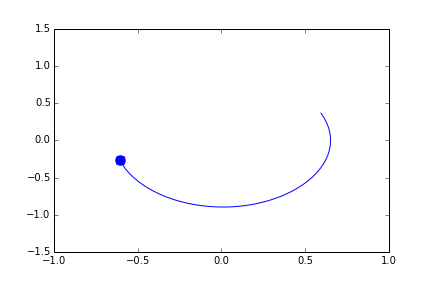
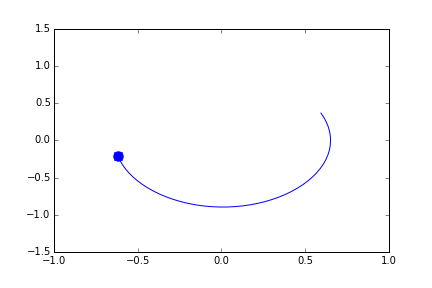
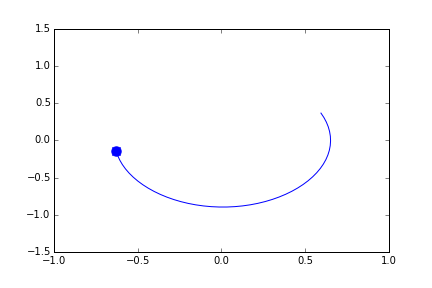
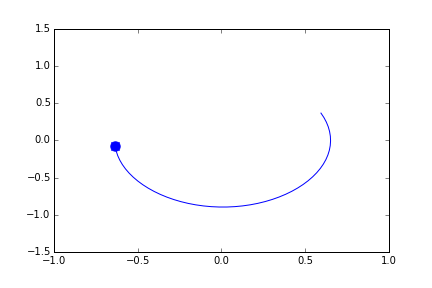
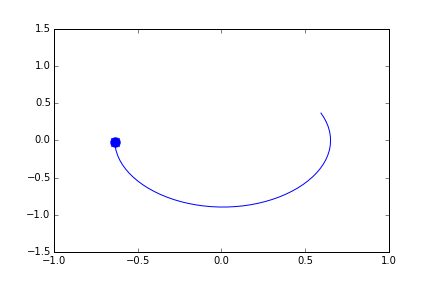
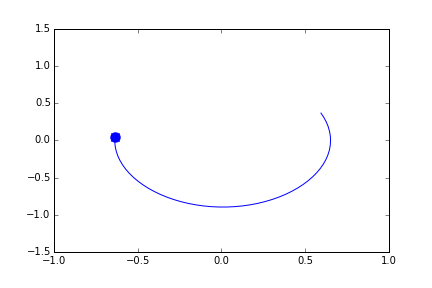
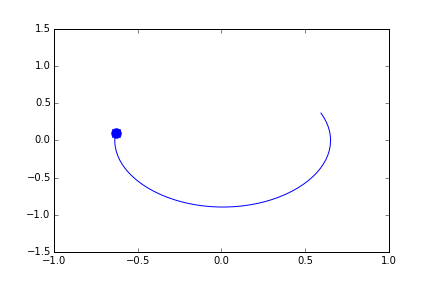
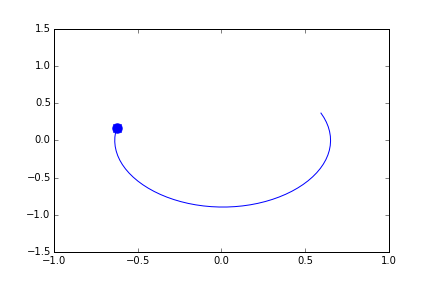
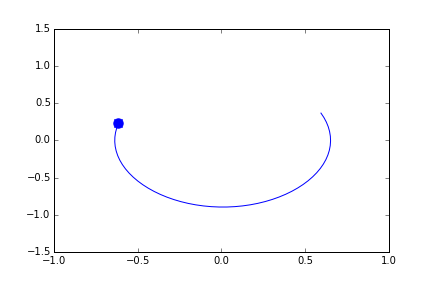
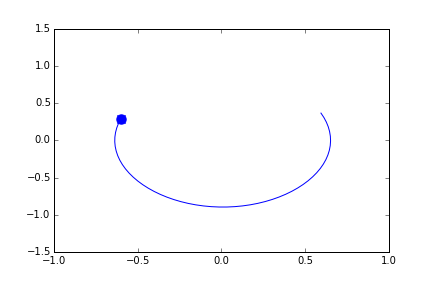
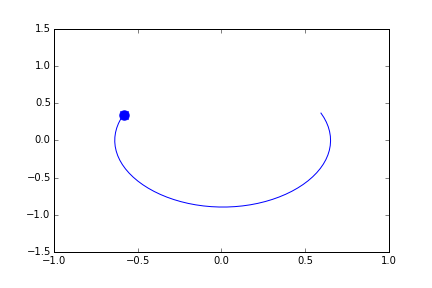
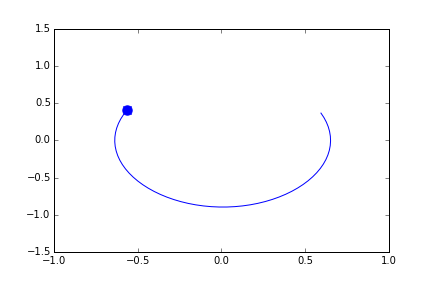
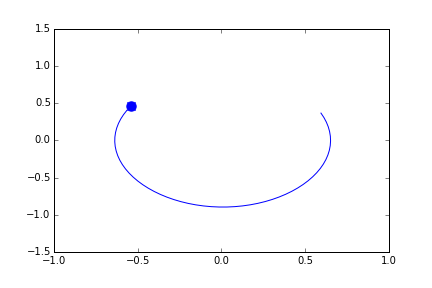
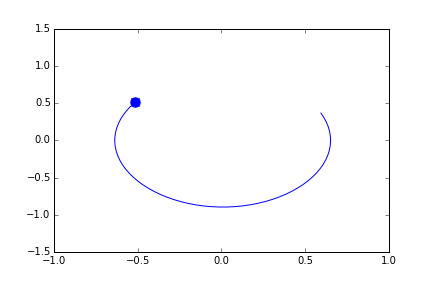
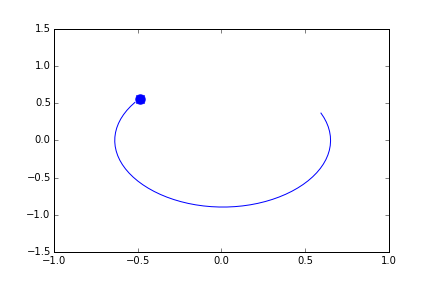
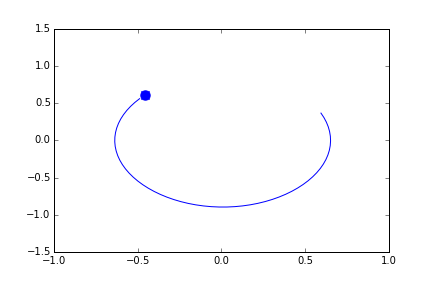
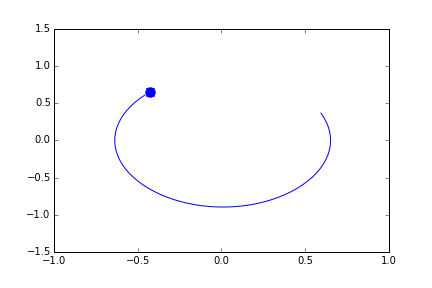
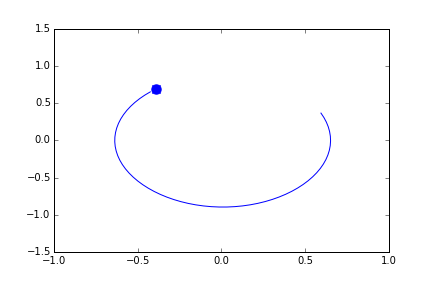
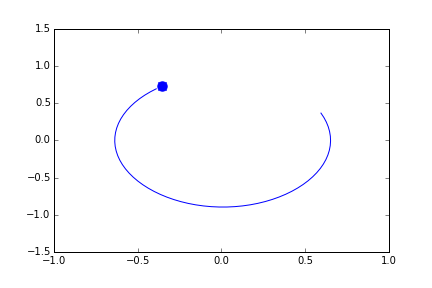
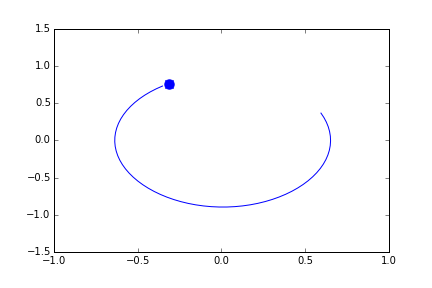
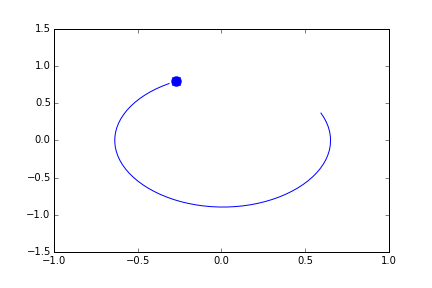
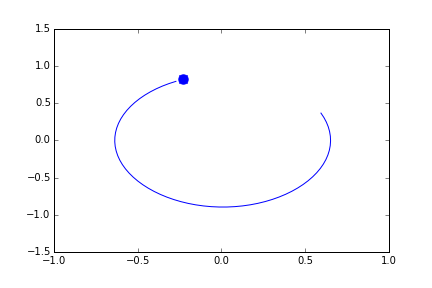
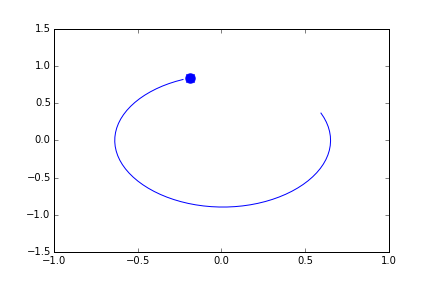
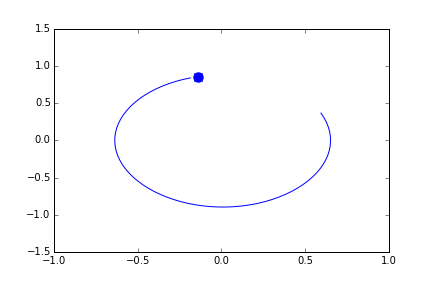
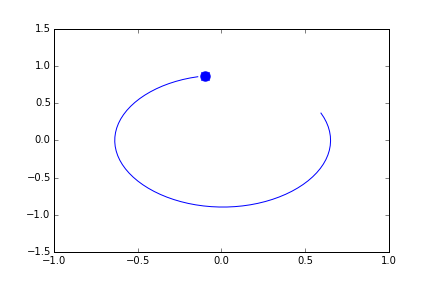
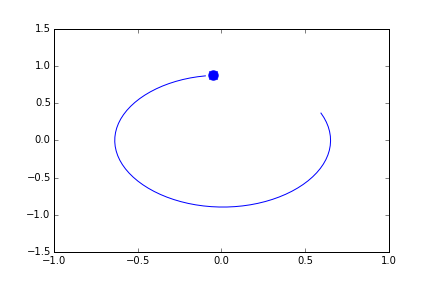
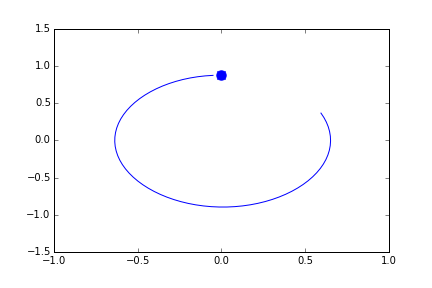
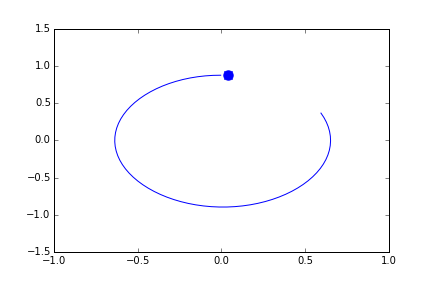
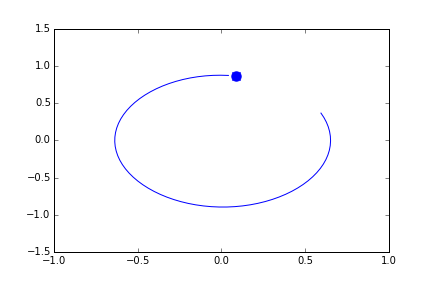
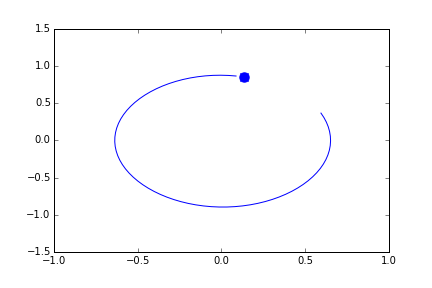
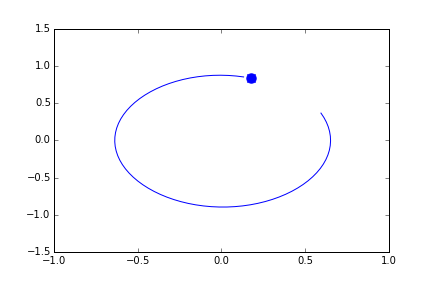
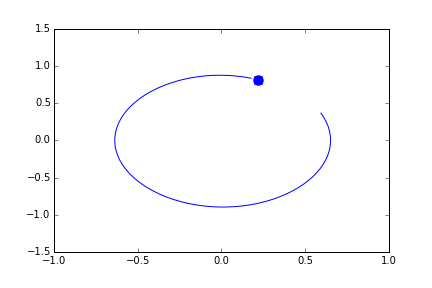
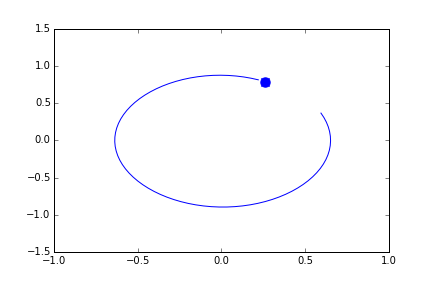
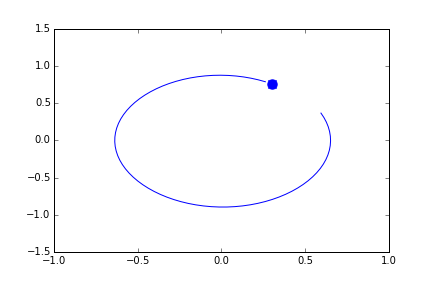
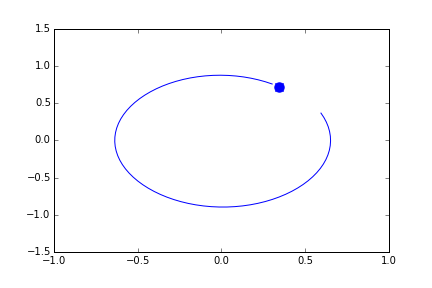
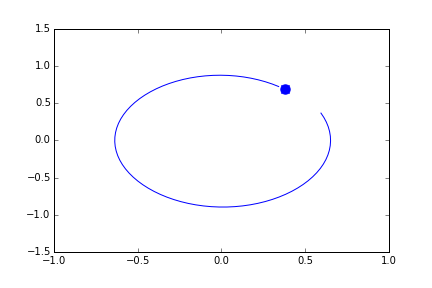
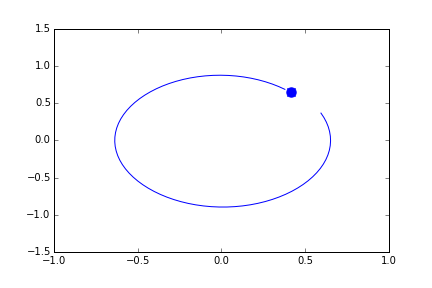
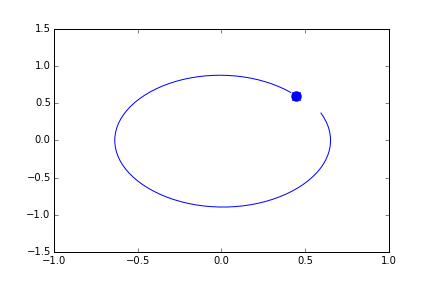
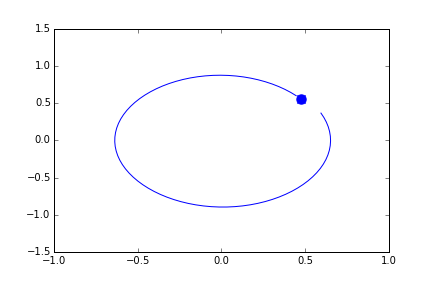
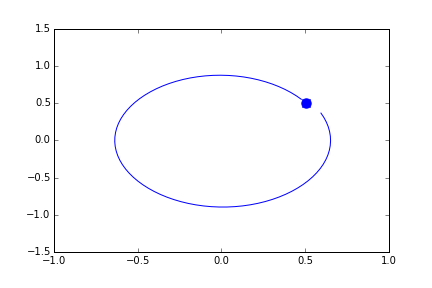
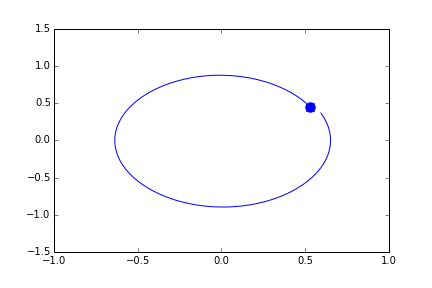
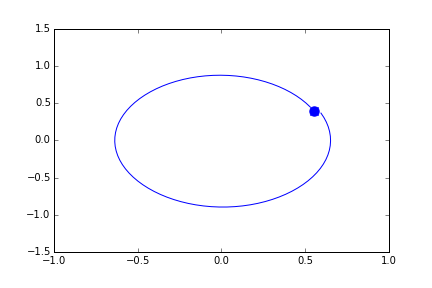
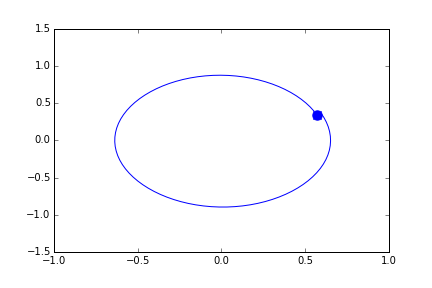
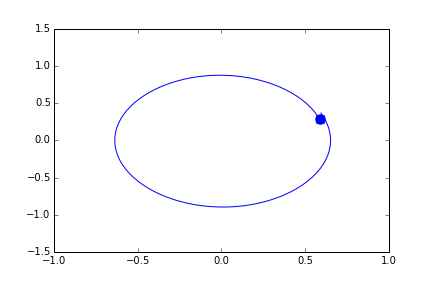
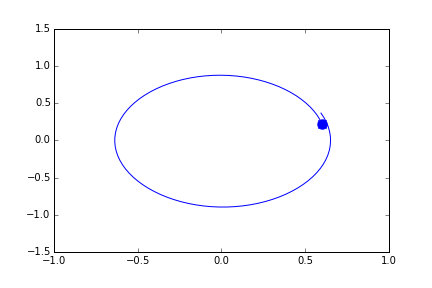
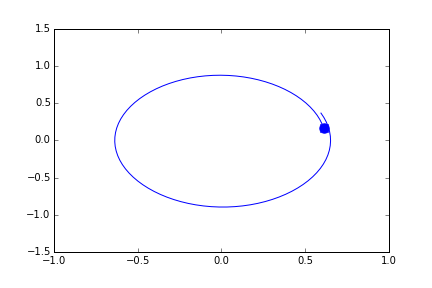
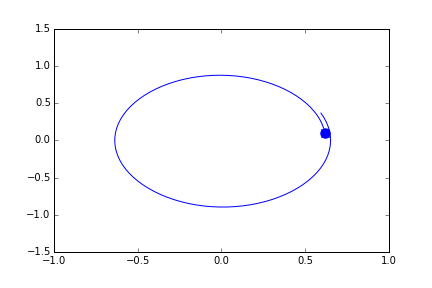
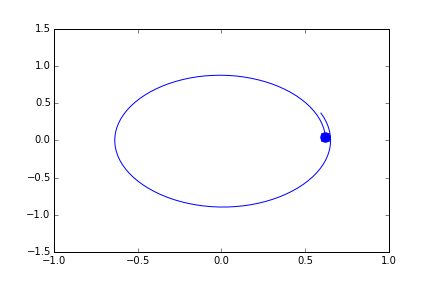
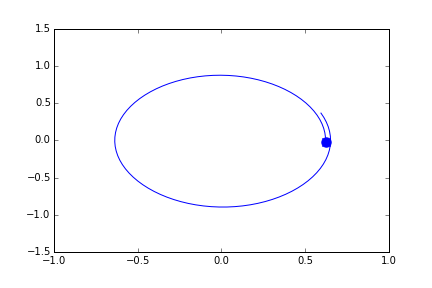
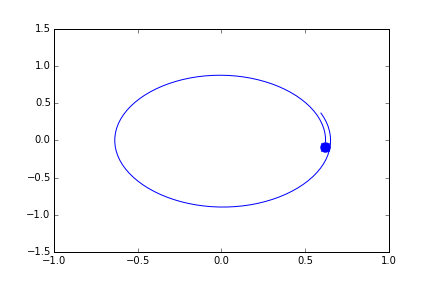
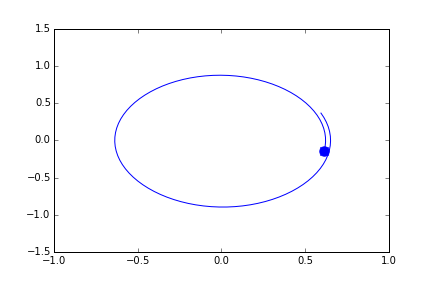
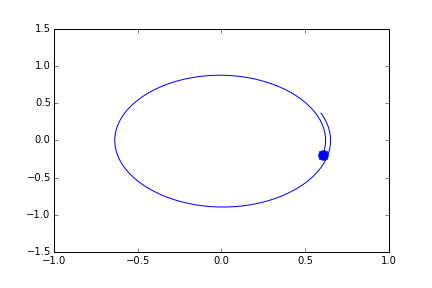
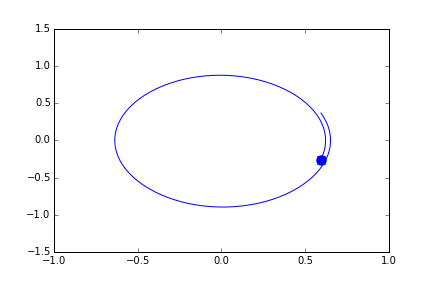
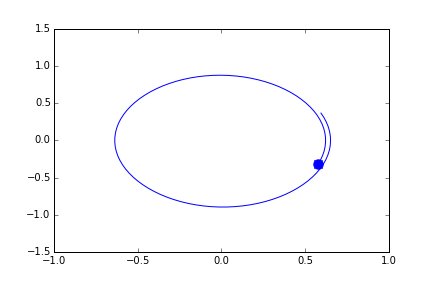
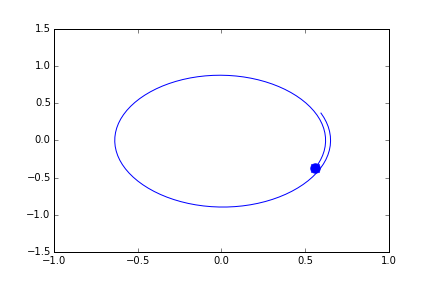
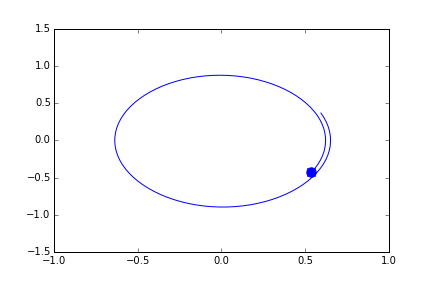
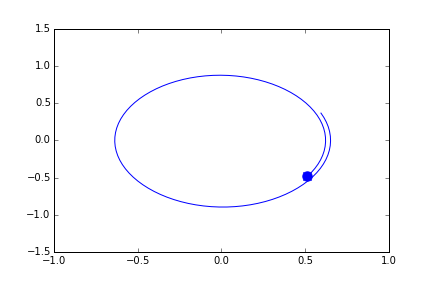
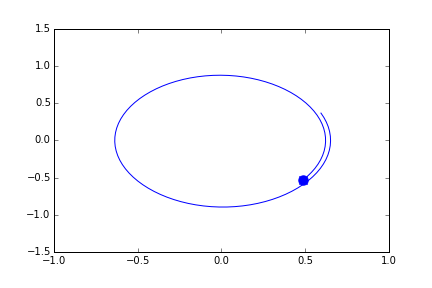
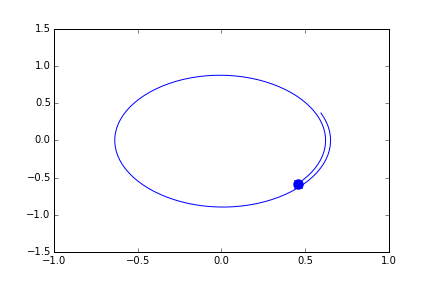
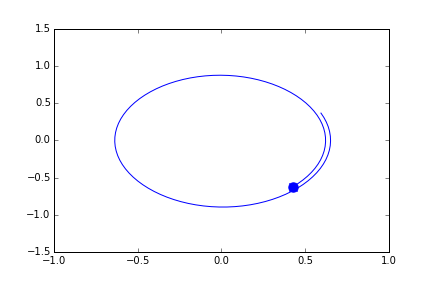
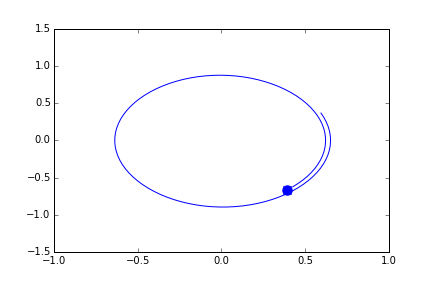
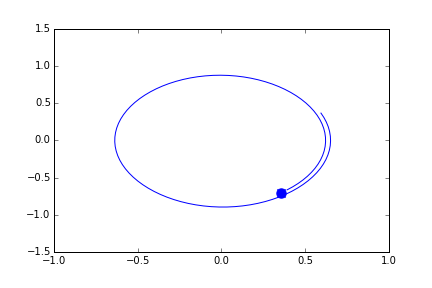
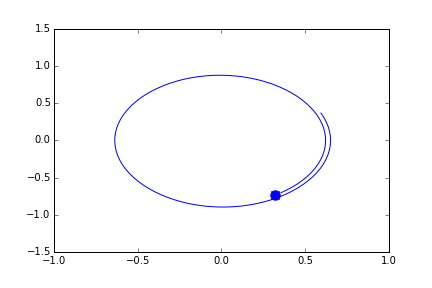
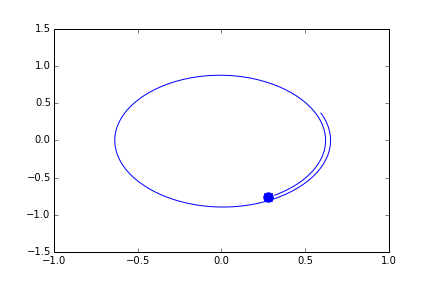
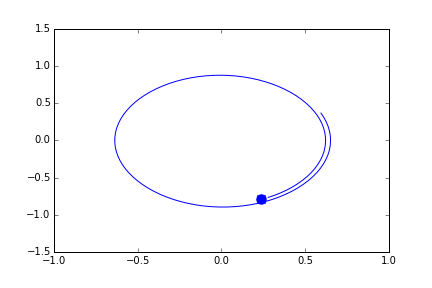
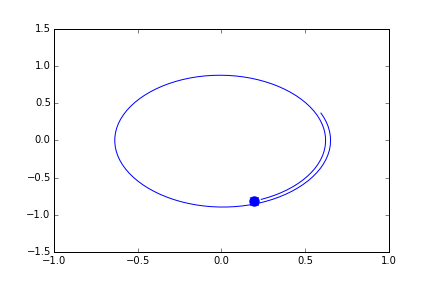
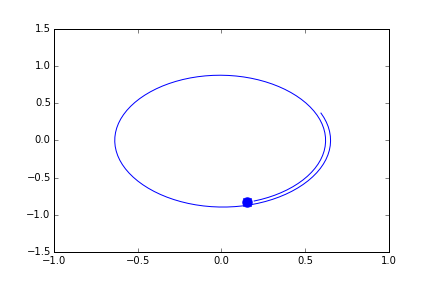
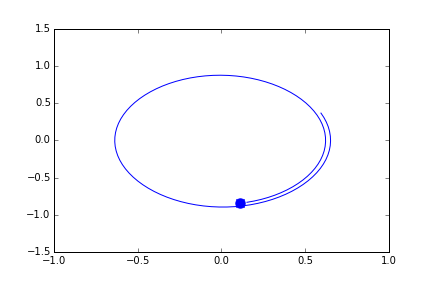
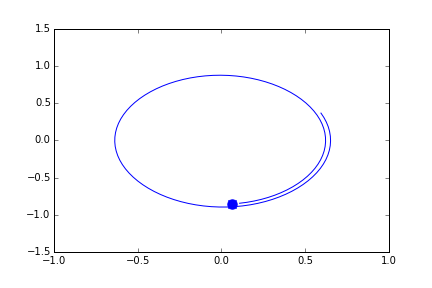
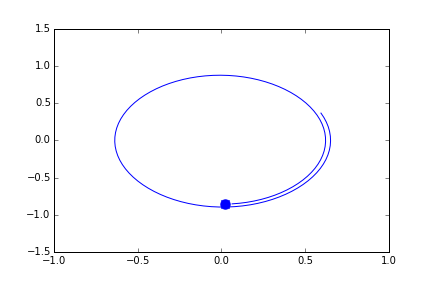
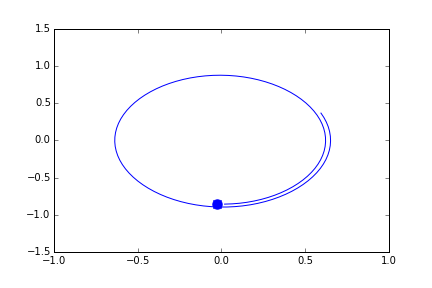
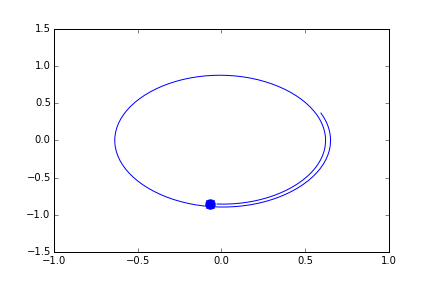
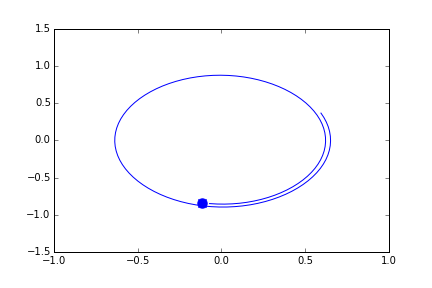
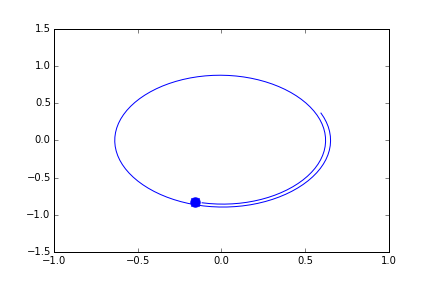
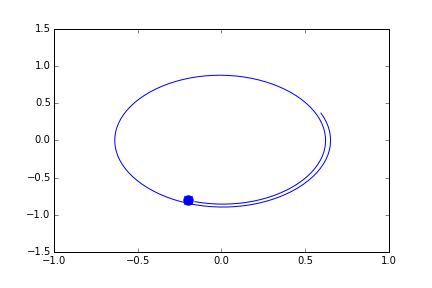
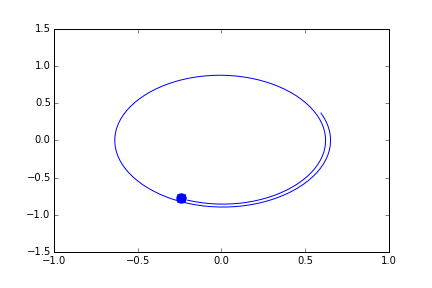
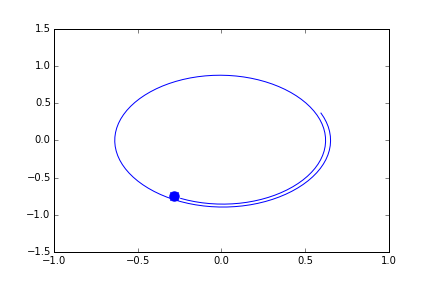
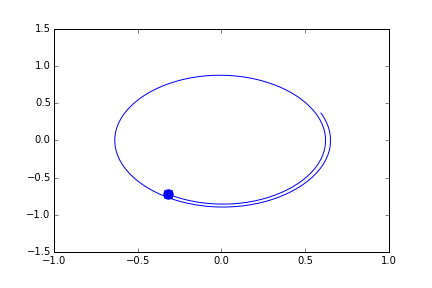
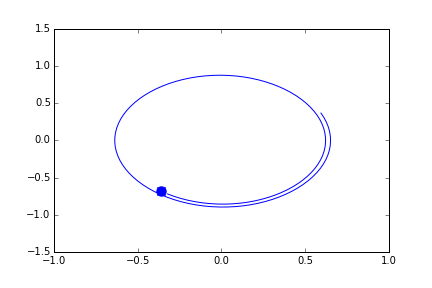
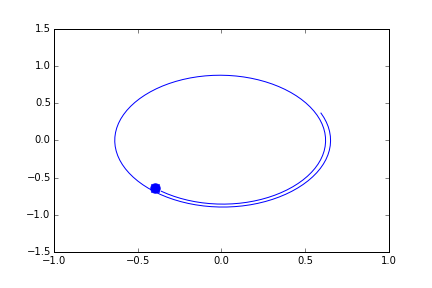
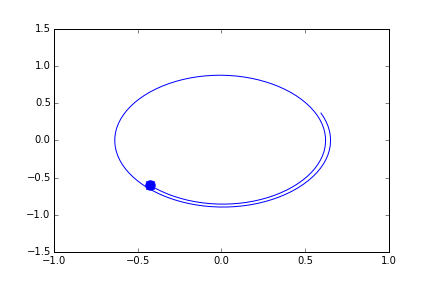
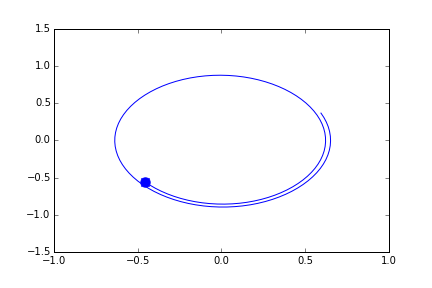
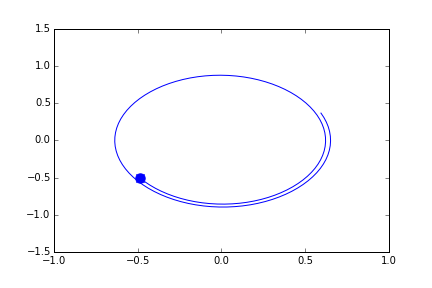
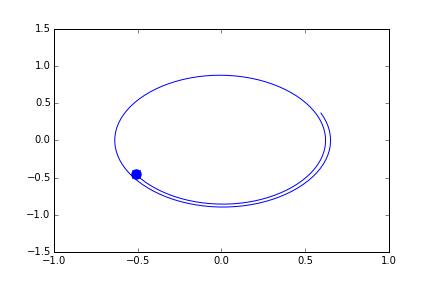
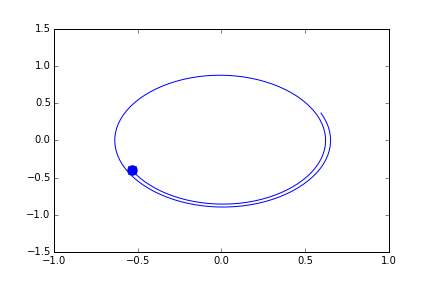
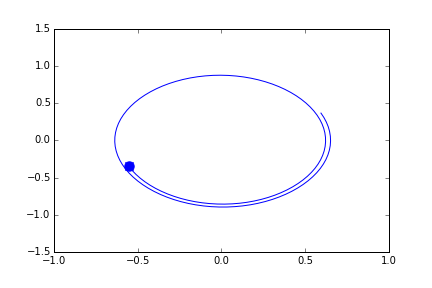
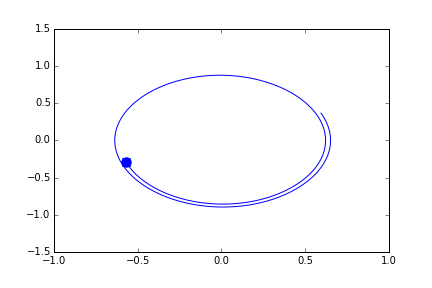
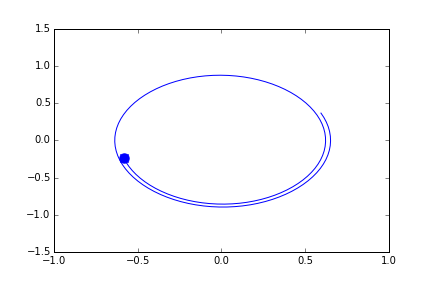
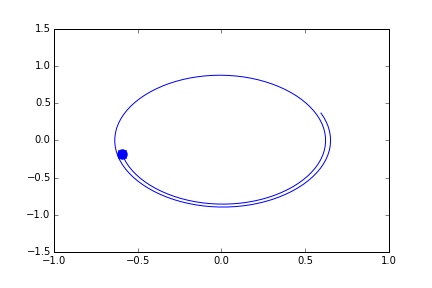
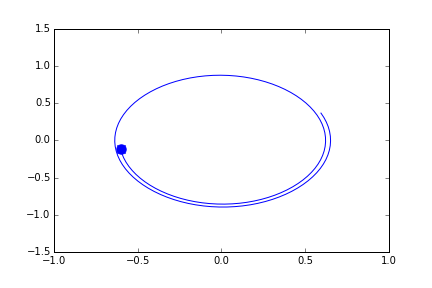
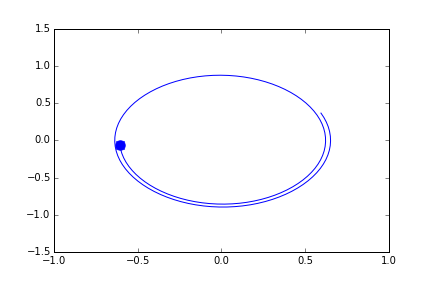
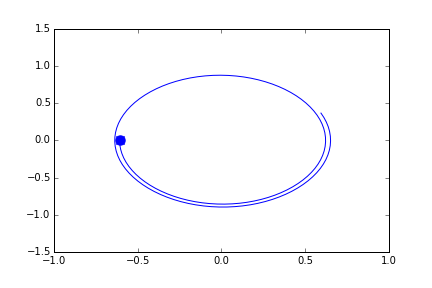
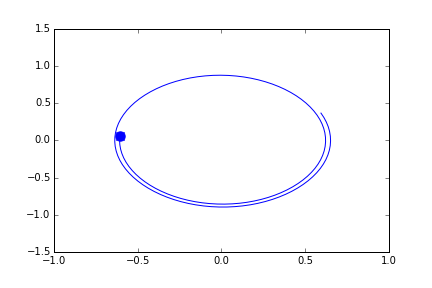
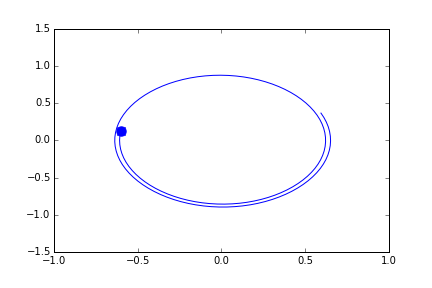
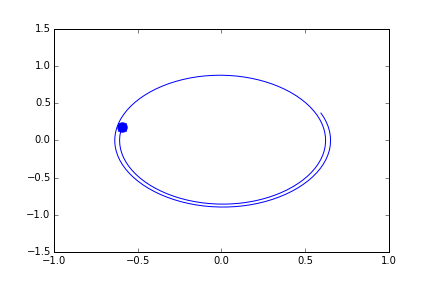
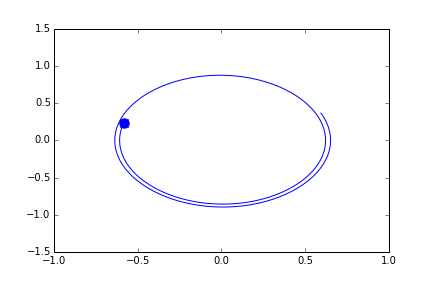
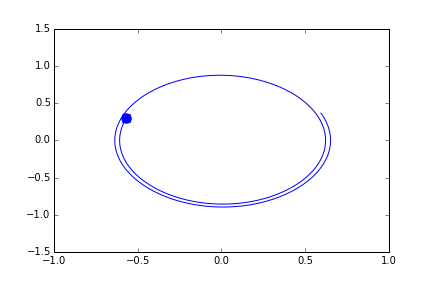
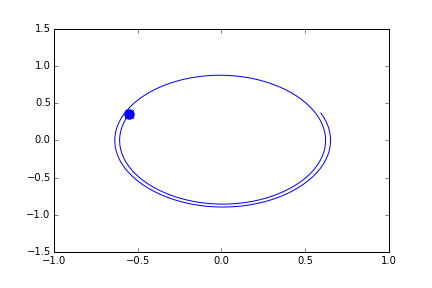
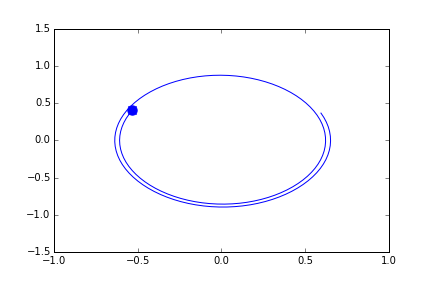
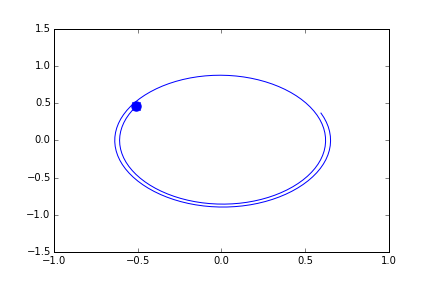
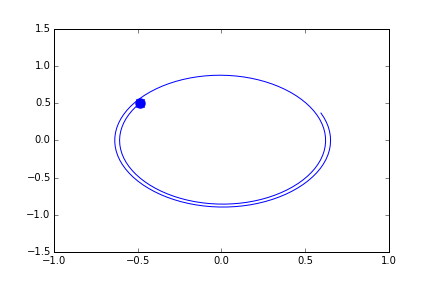
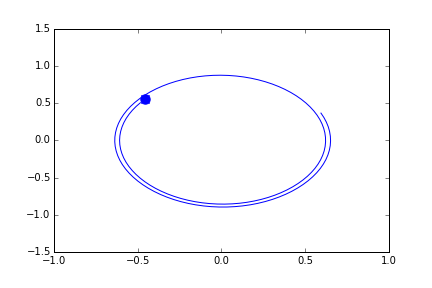
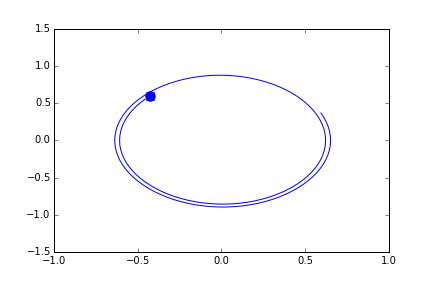
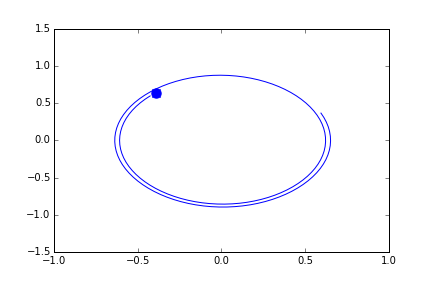
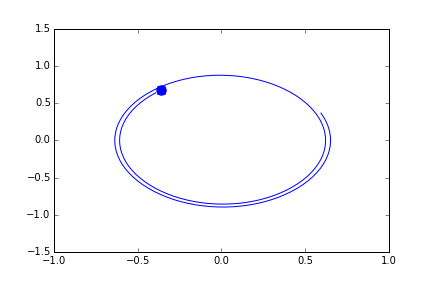
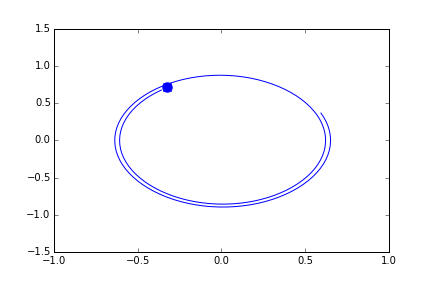
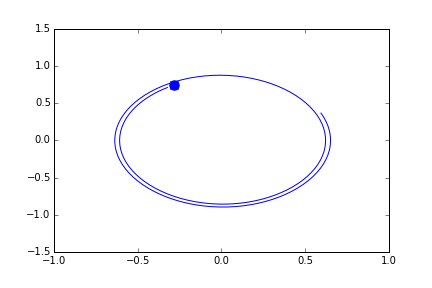
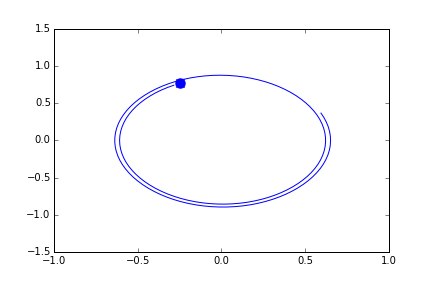
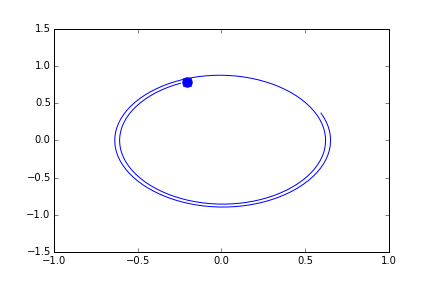
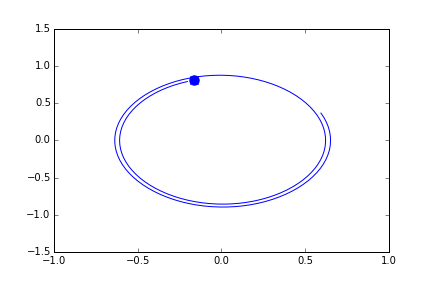
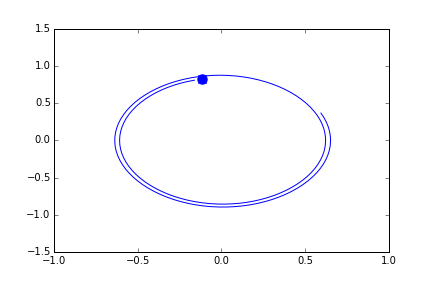
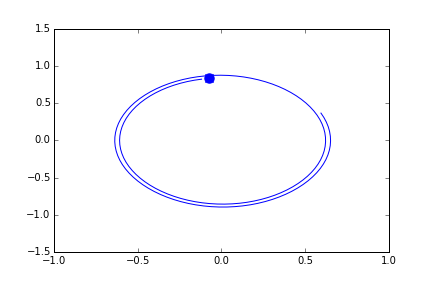
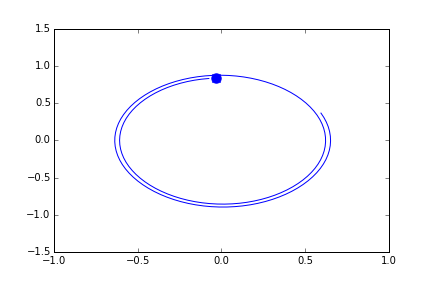
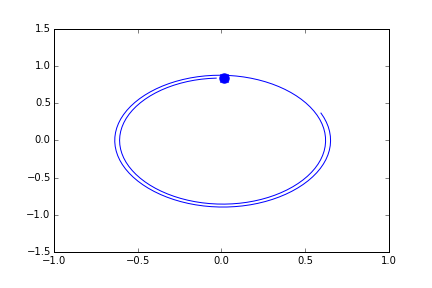
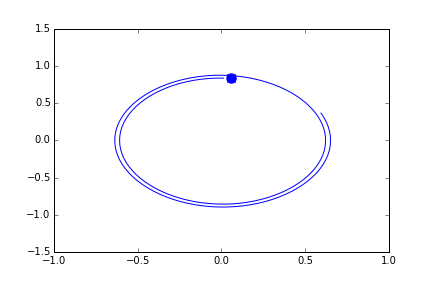
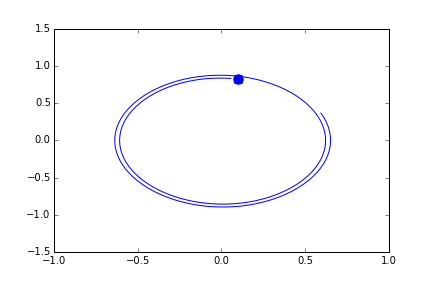
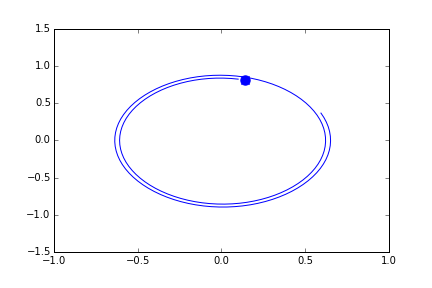
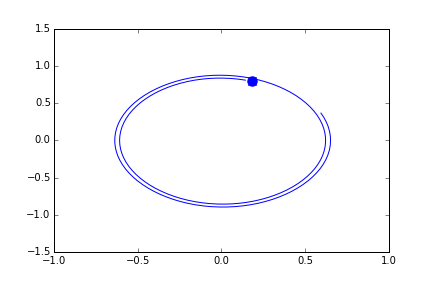
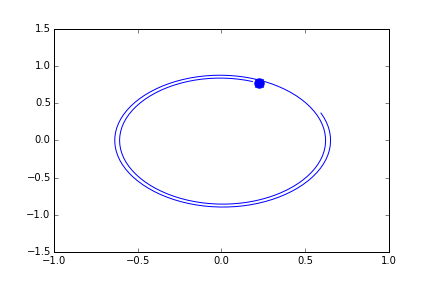
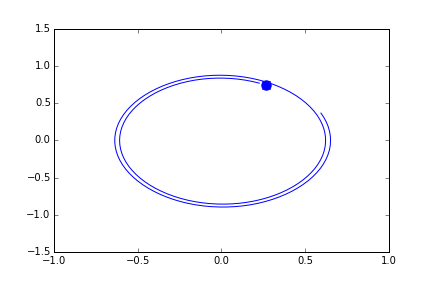
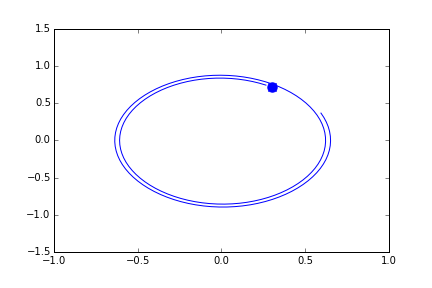
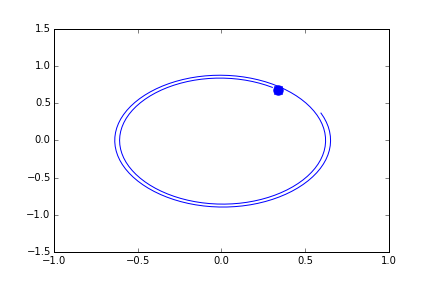
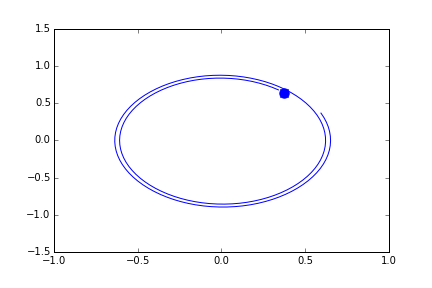
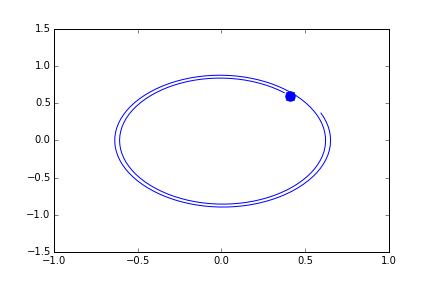
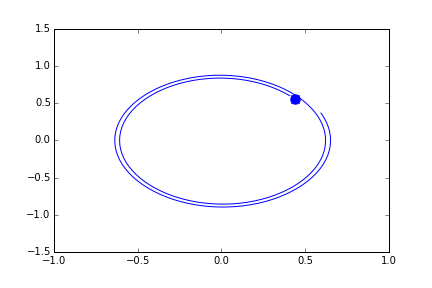
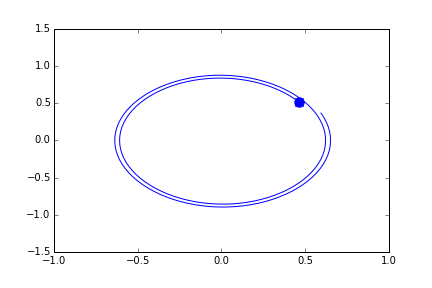
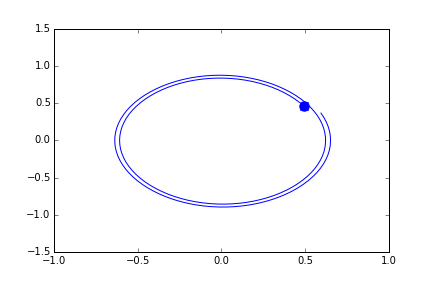
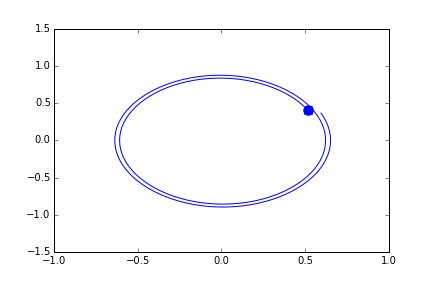
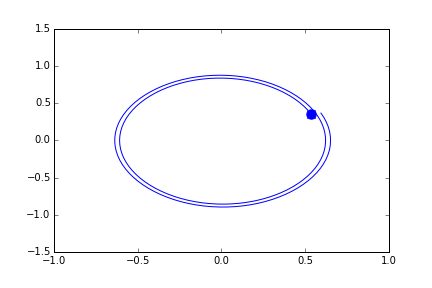
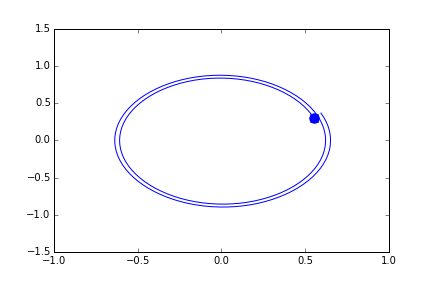
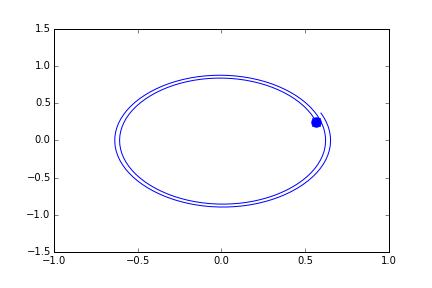
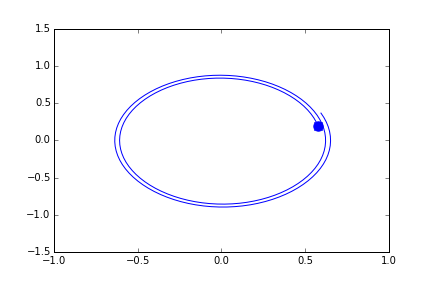
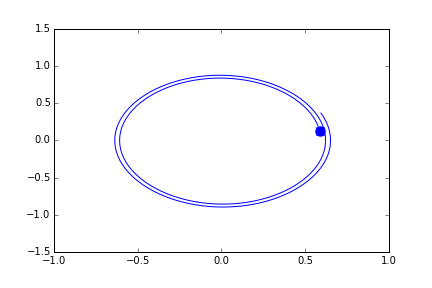
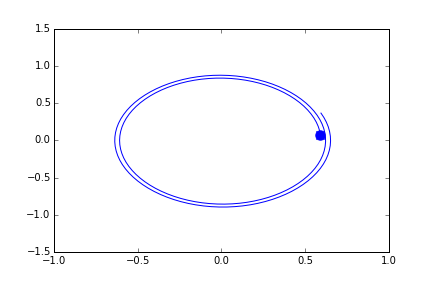
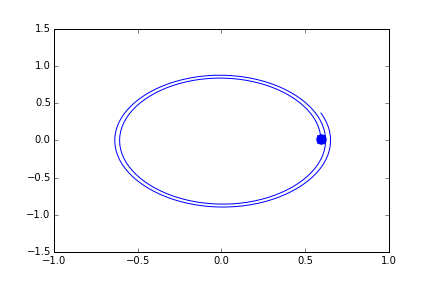
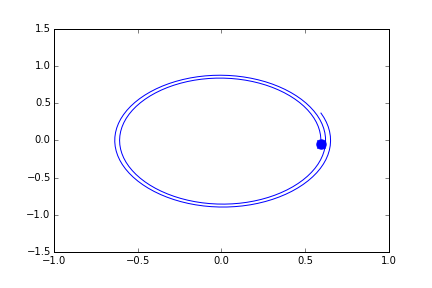
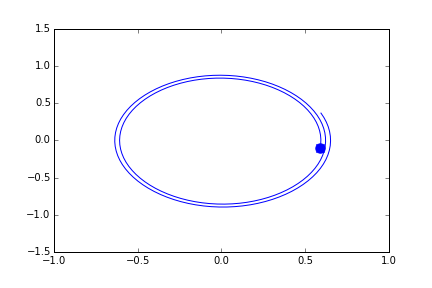
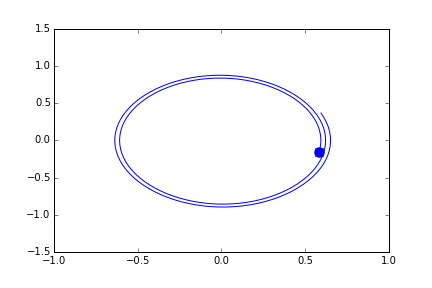
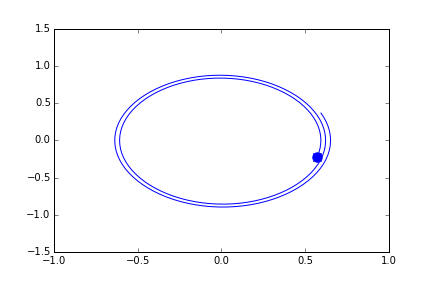
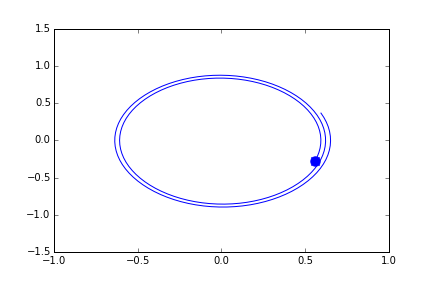
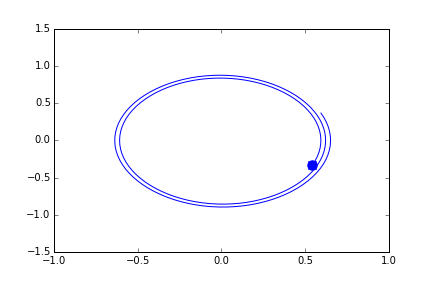
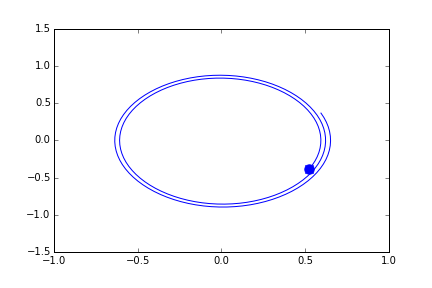
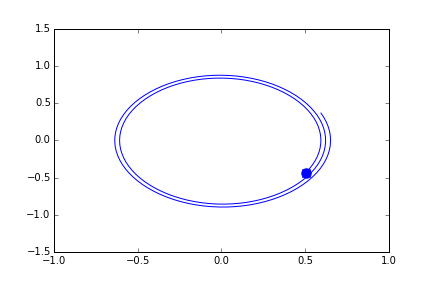
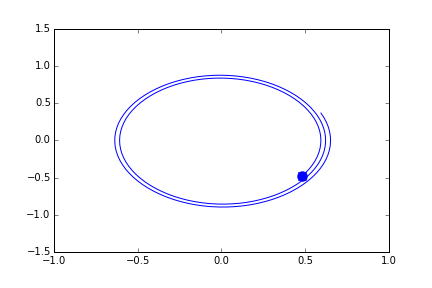
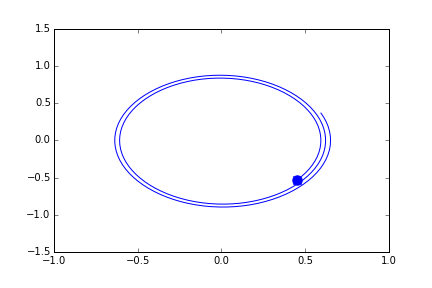
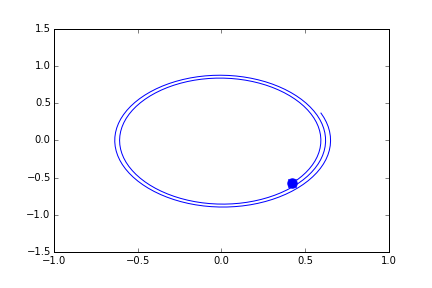
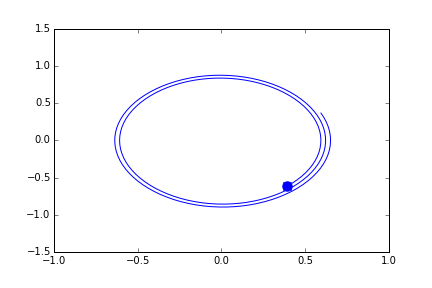
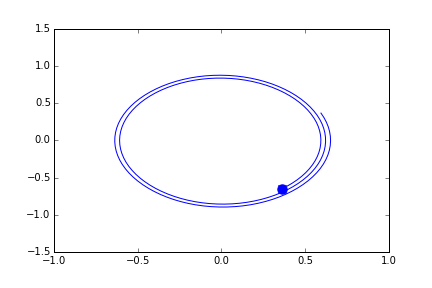
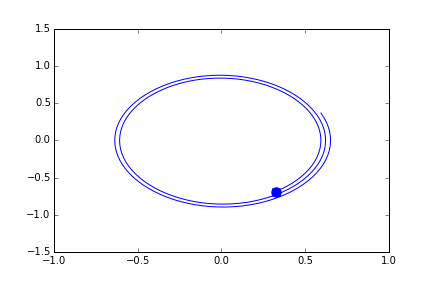
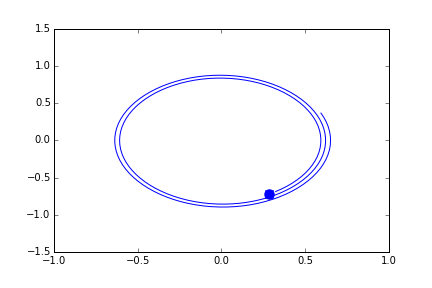
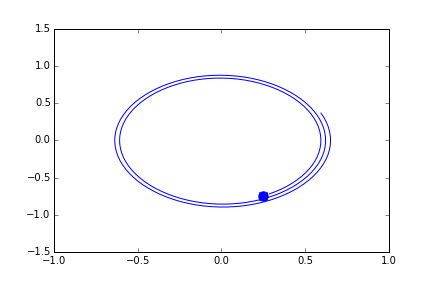
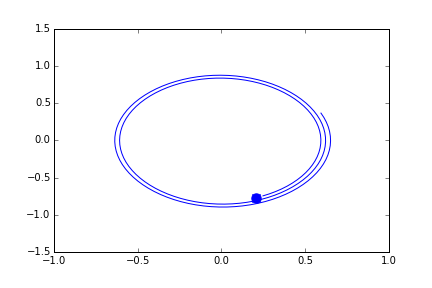
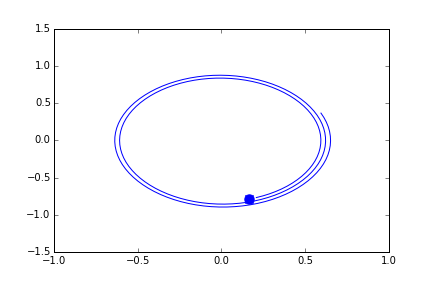
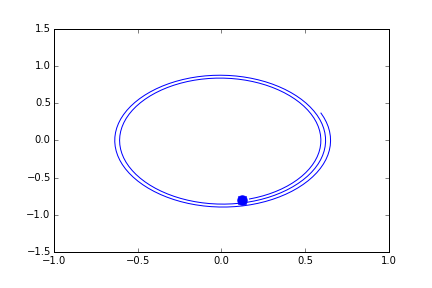
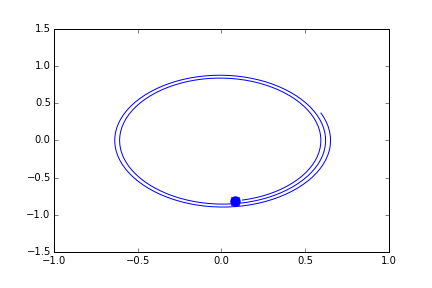
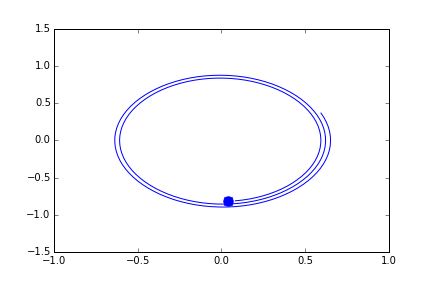
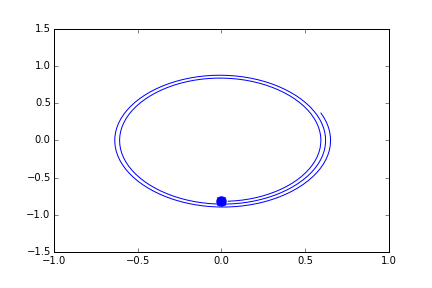
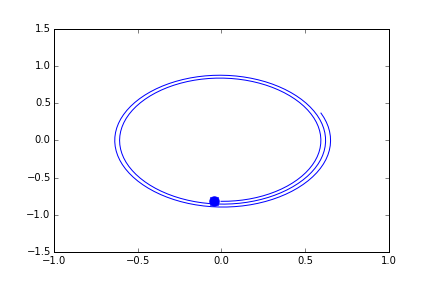
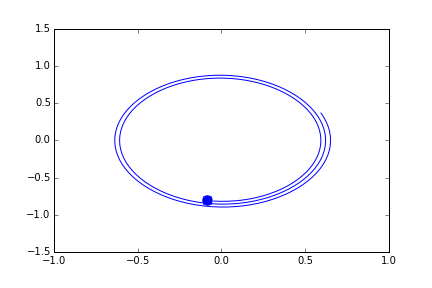
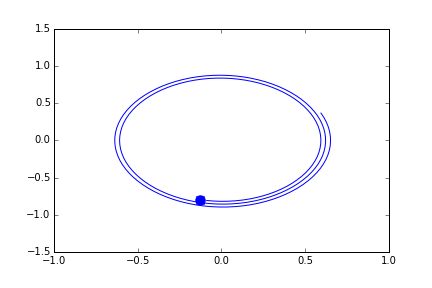
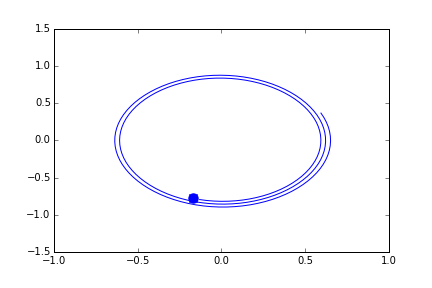
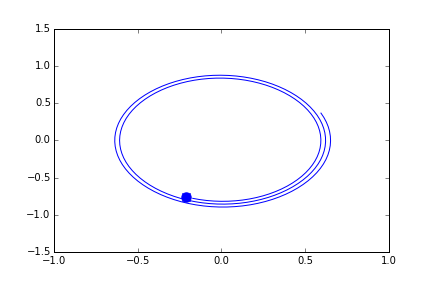
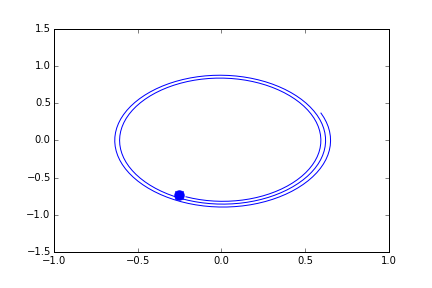
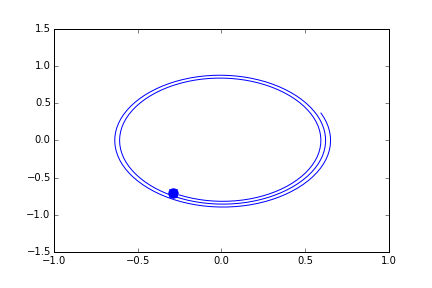
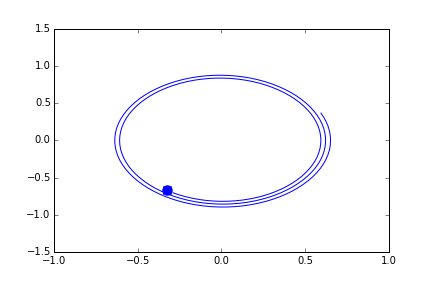
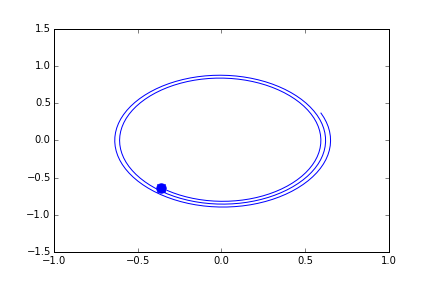
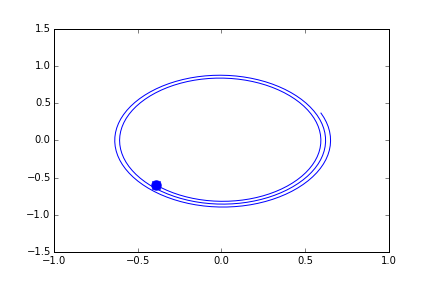
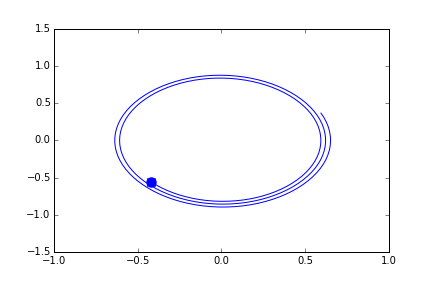
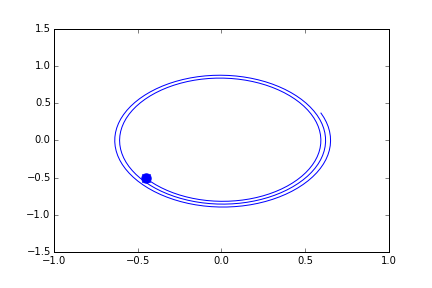
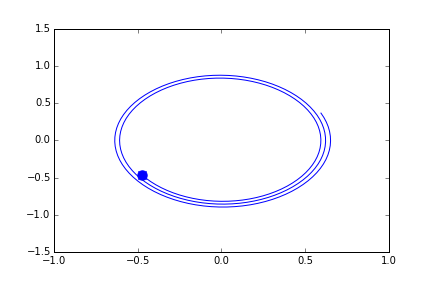
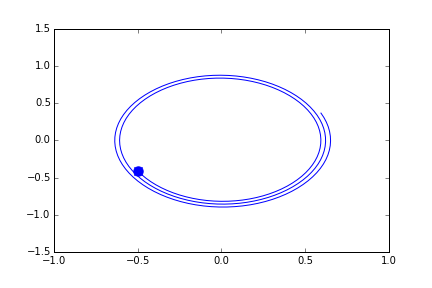
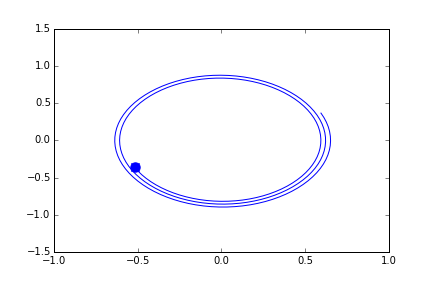
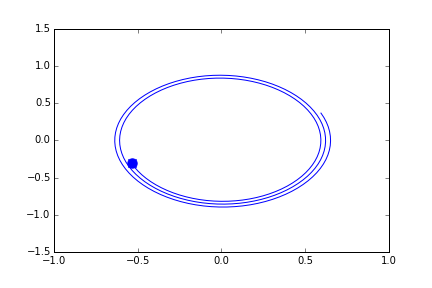
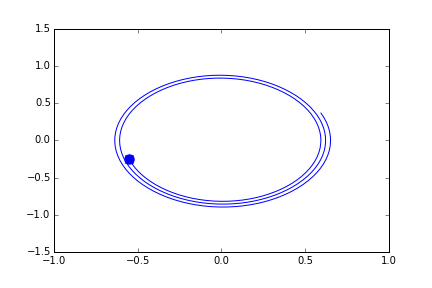
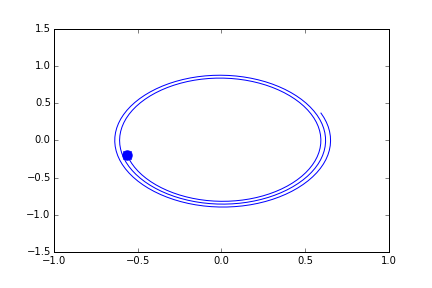
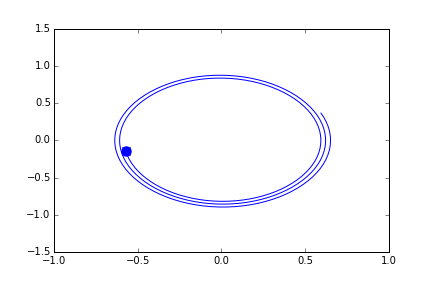
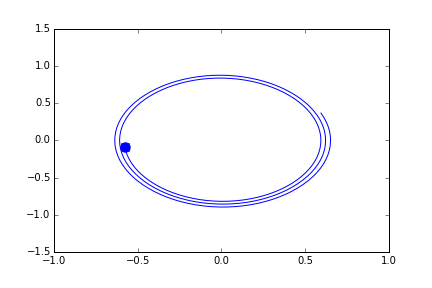
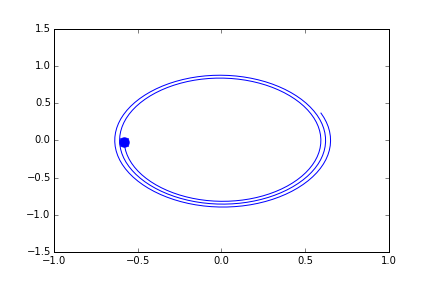
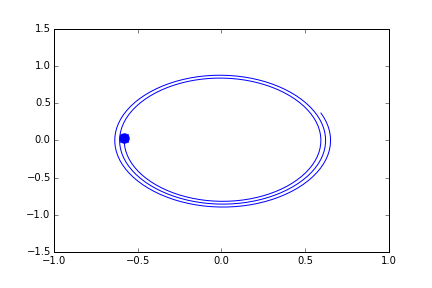
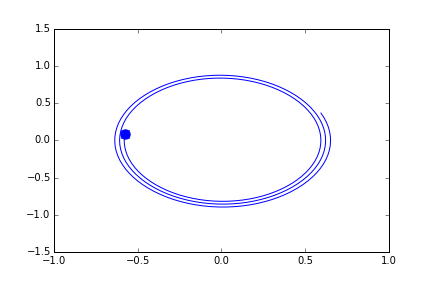
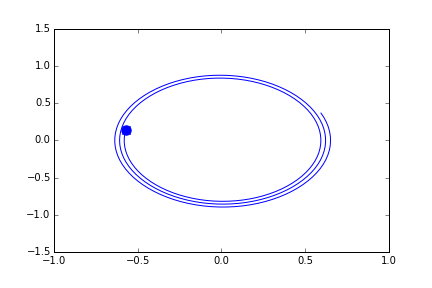
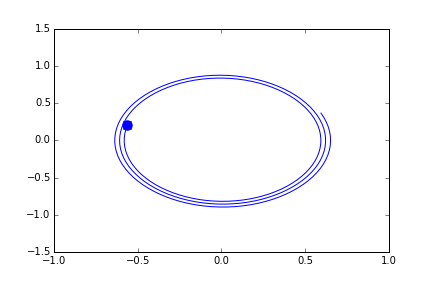
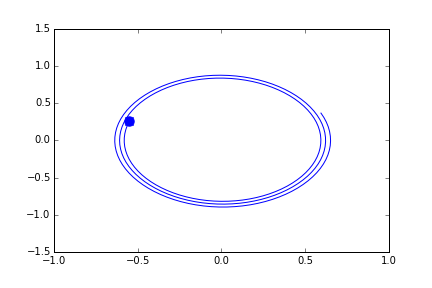
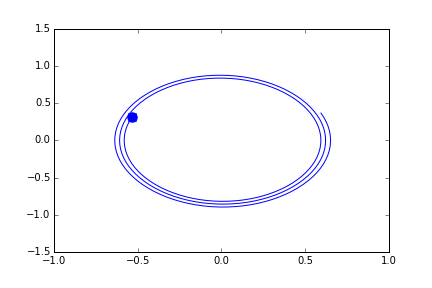
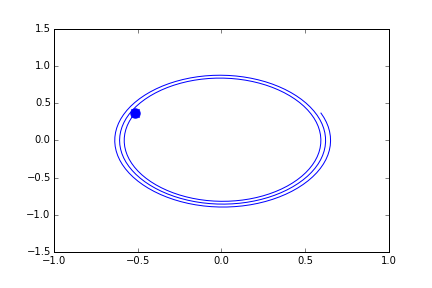
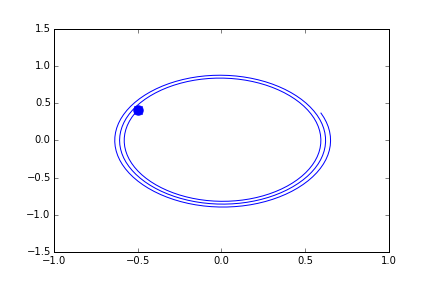
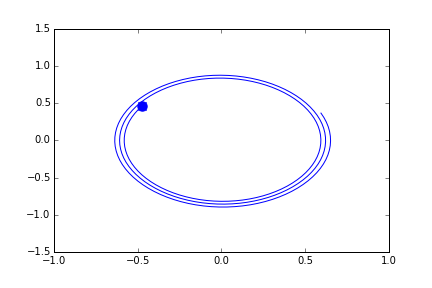
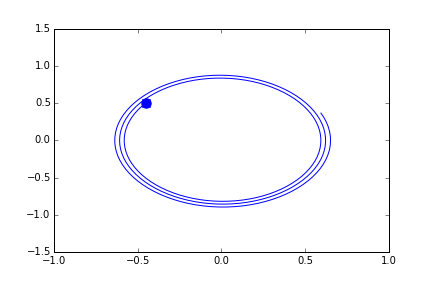
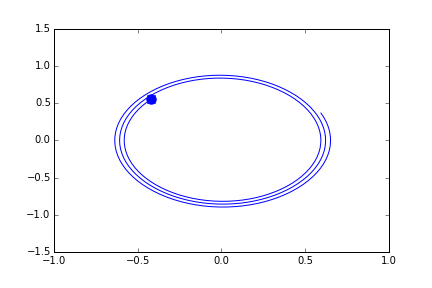
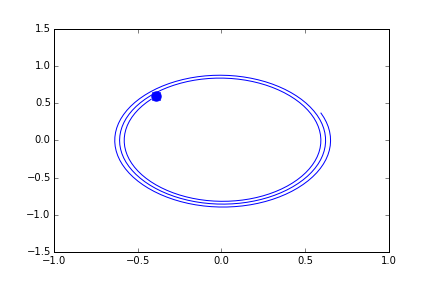
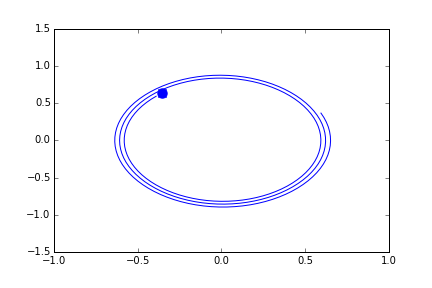
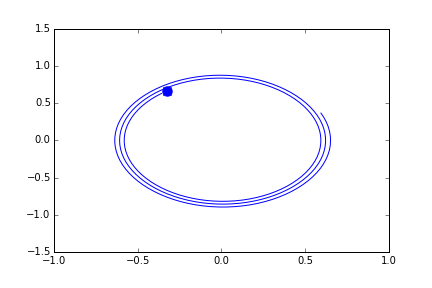
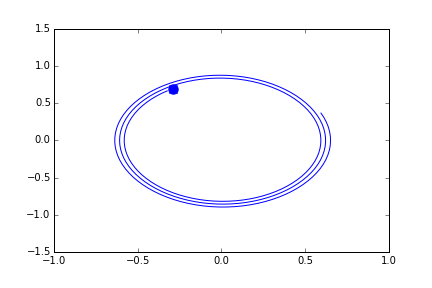
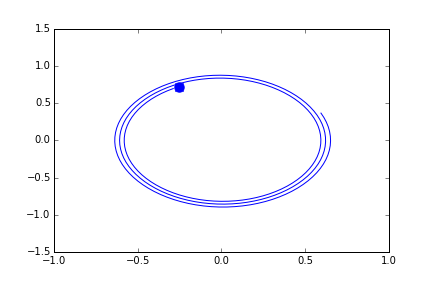
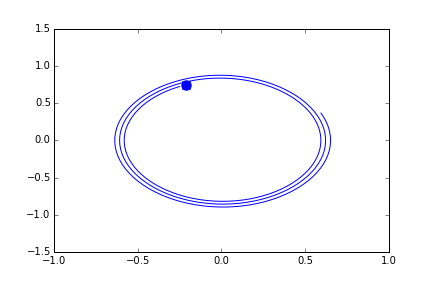
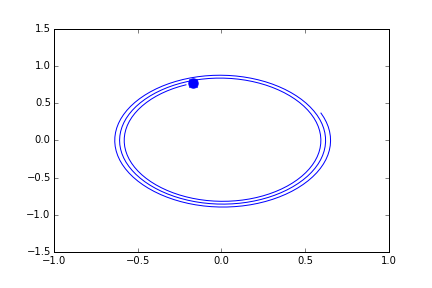
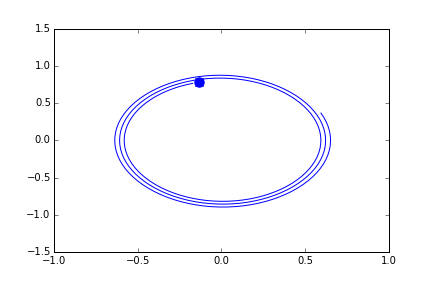
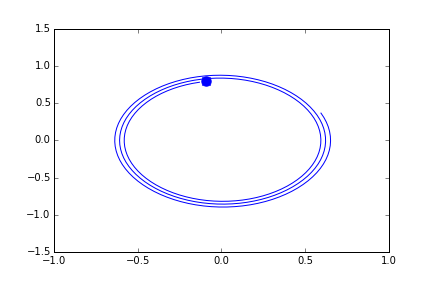
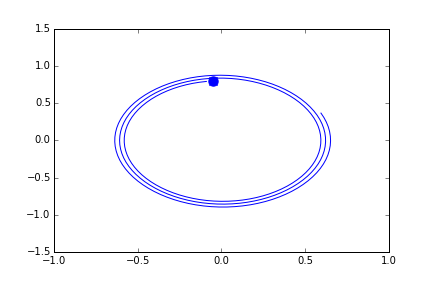
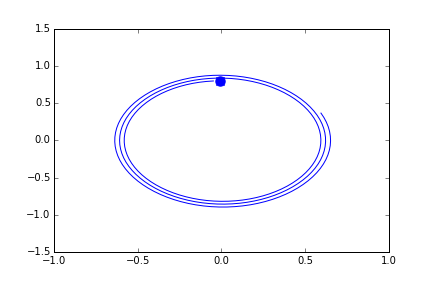
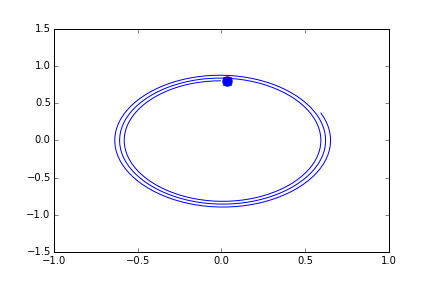
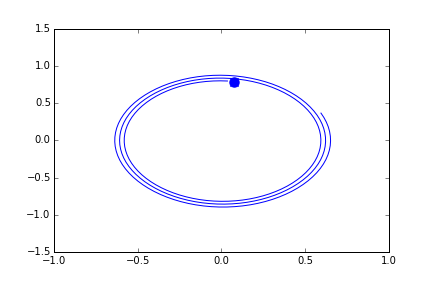
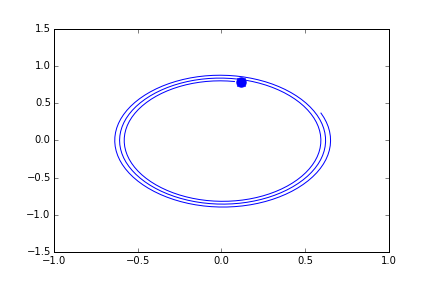
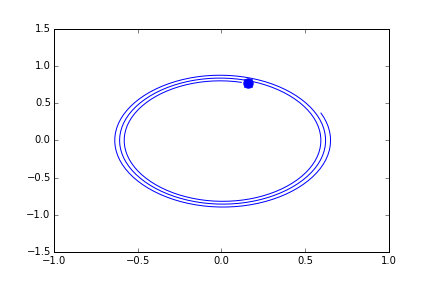
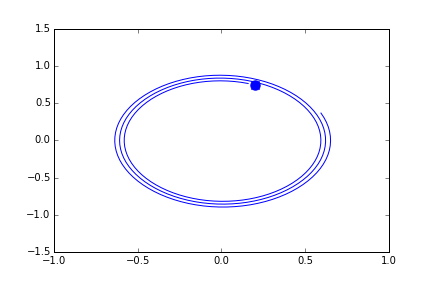
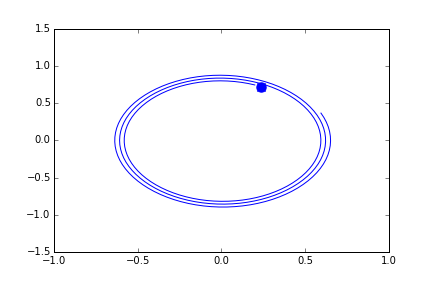
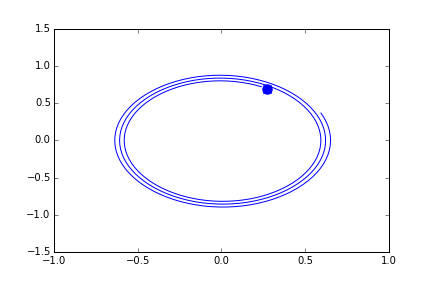
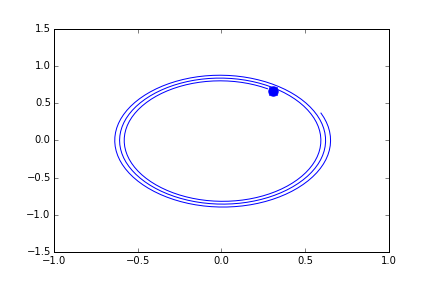
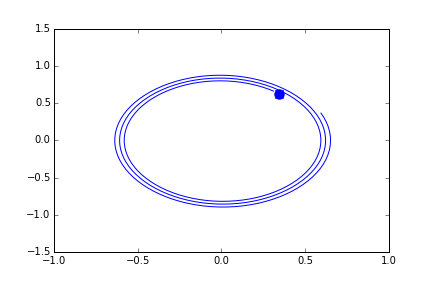
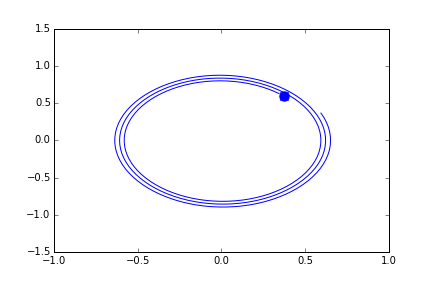
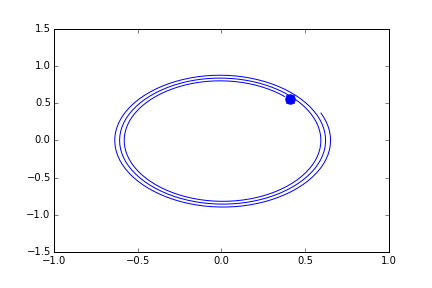
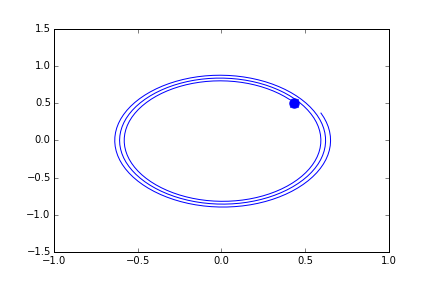
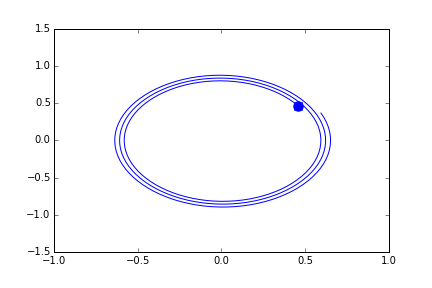
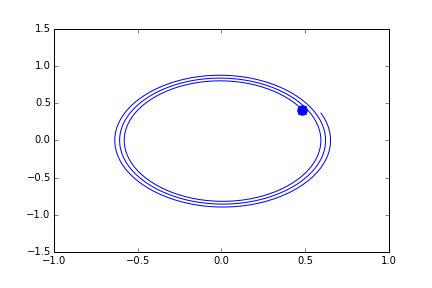
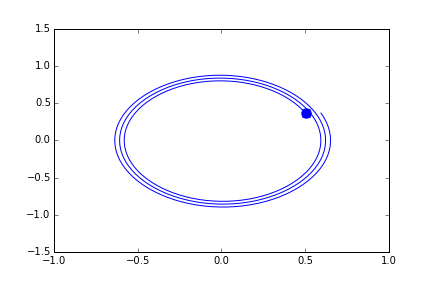
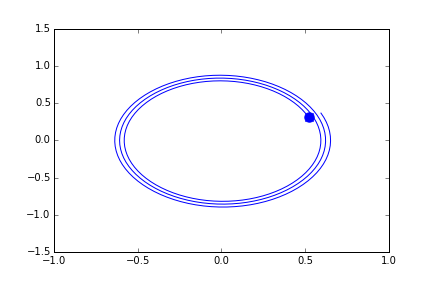
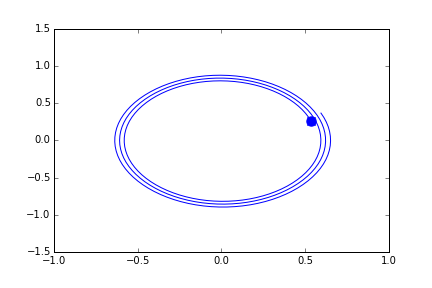
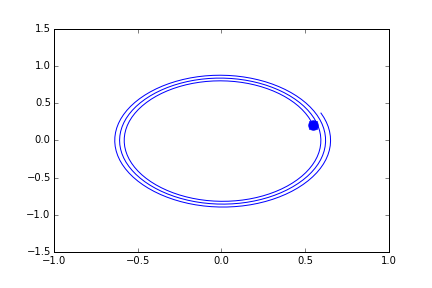
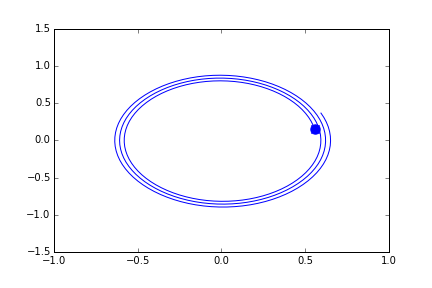
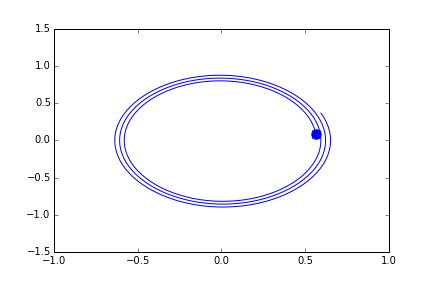
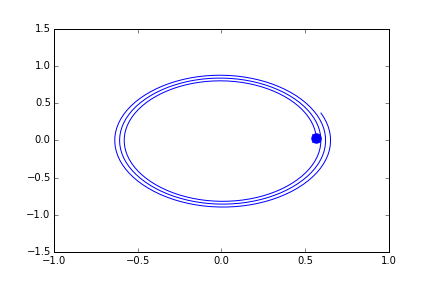
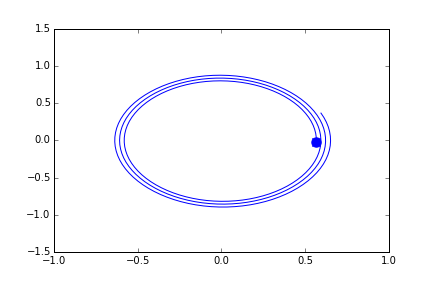
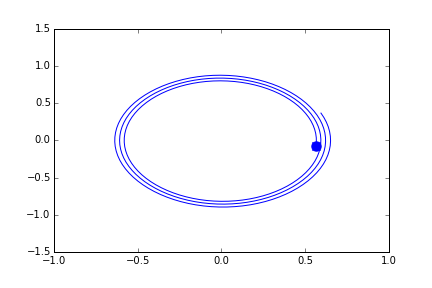
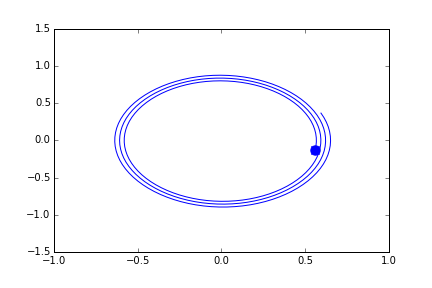
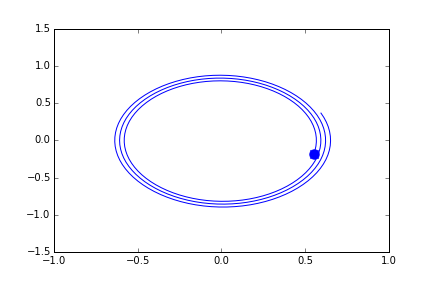
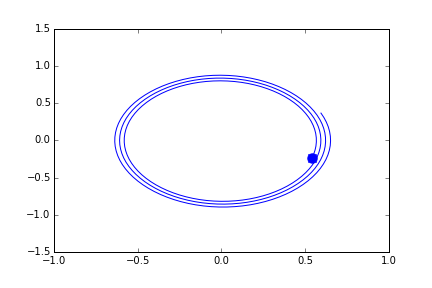
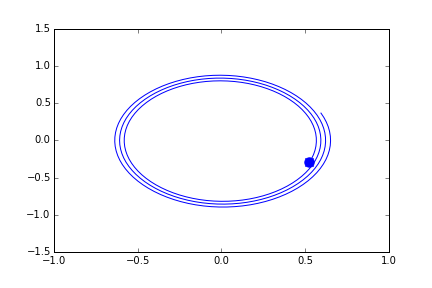
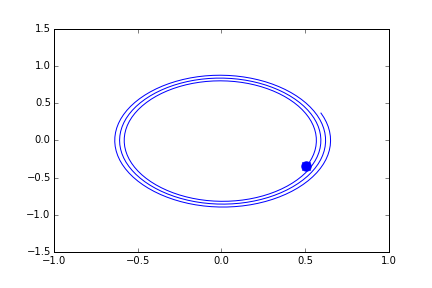
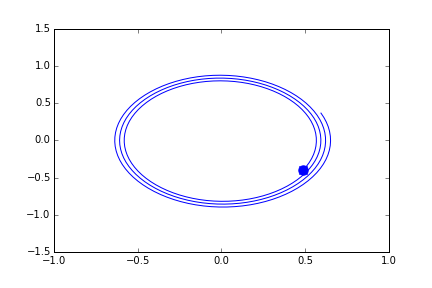
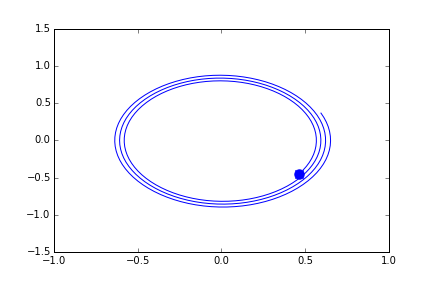
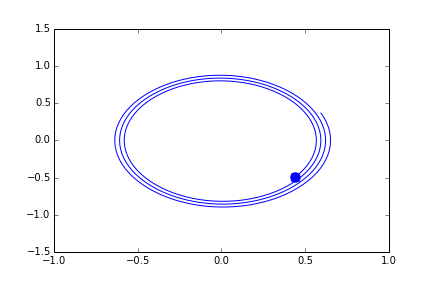
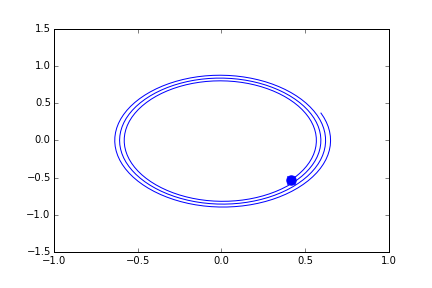
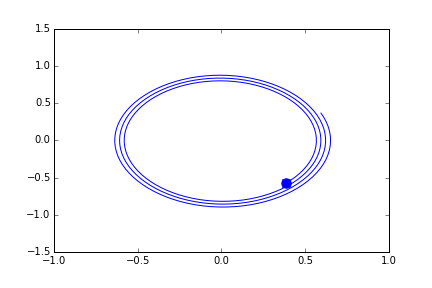
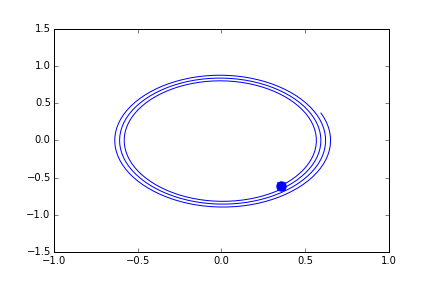
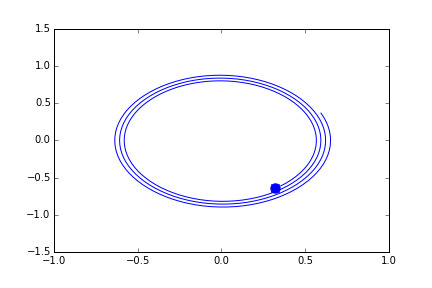
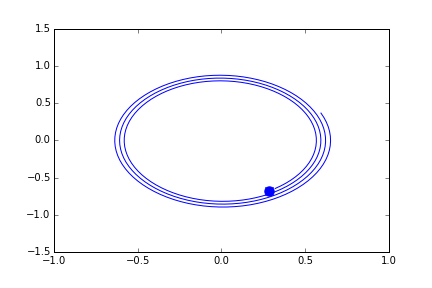
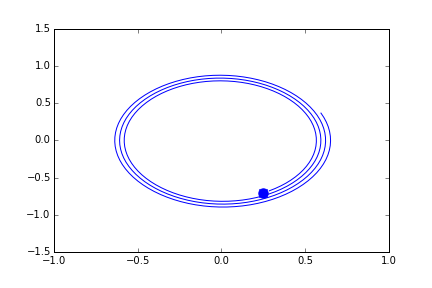
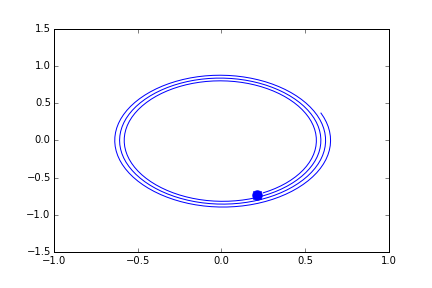
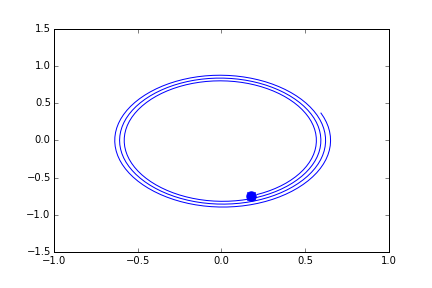
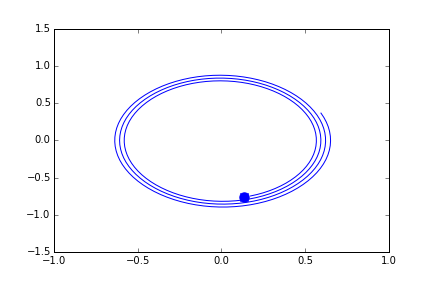
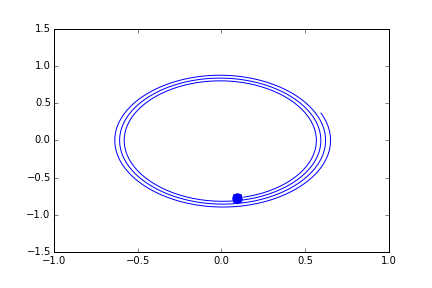
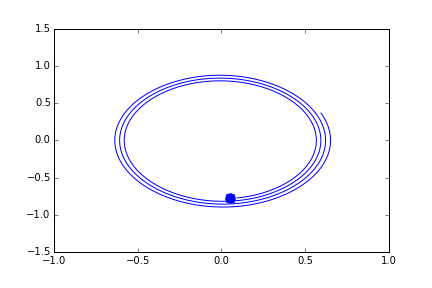
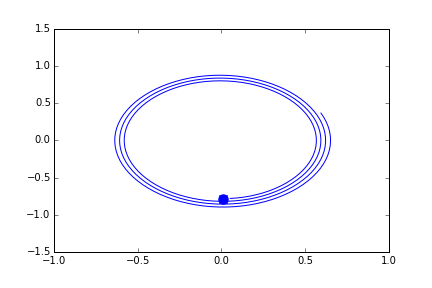
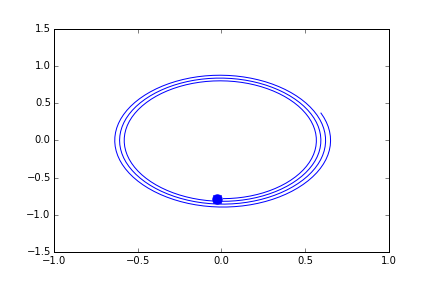
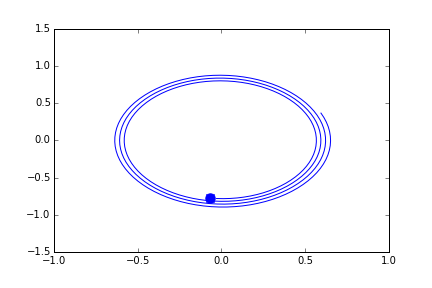
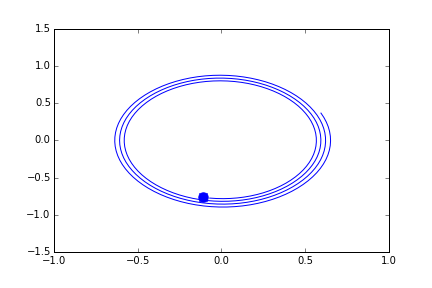
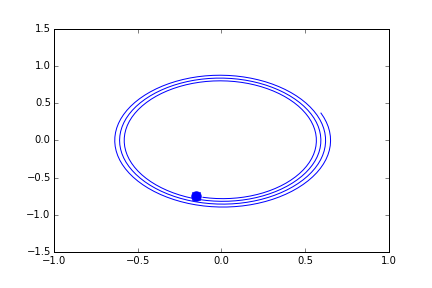
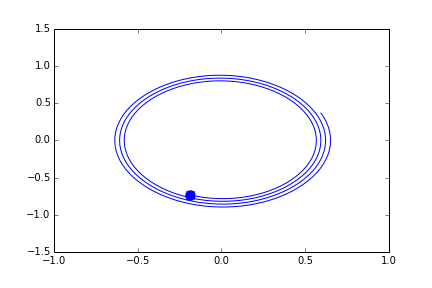
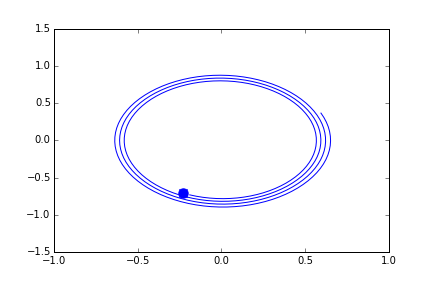
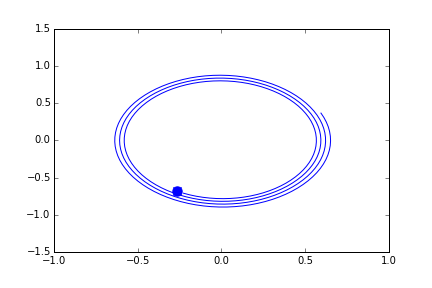
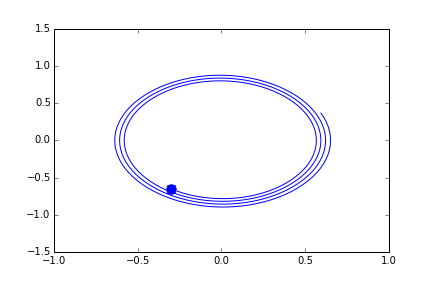
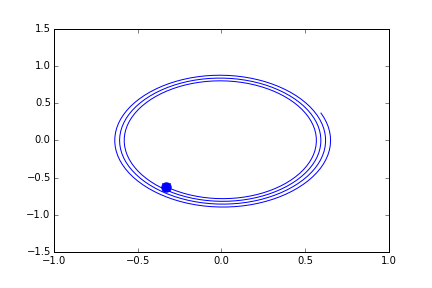
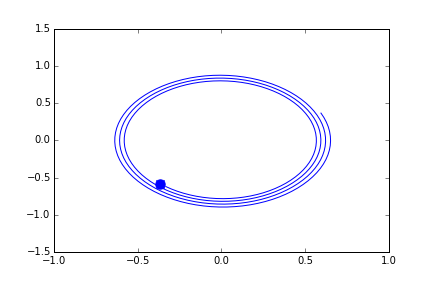
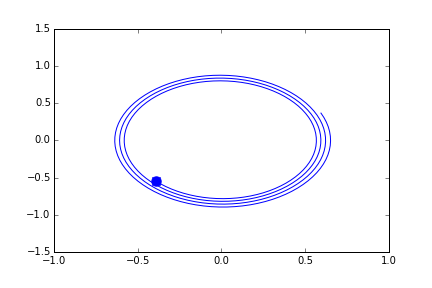
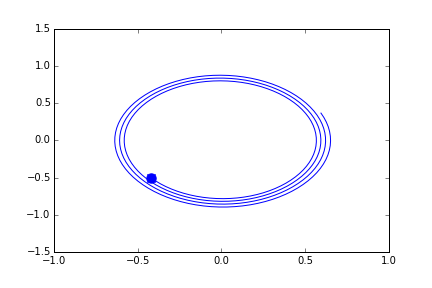

In [4]:
def pendulo(y,t,param=[0.01,1.]):
    return array( [ y[1], -(2.*param[0]*y[1] + param[1]*sin(y[0]) )] )

tiempo = linspace(0,5*pi,300)
cond_ini = [rand(), rand() ]
sol = odeint(pendulo,cond_ini,tiempo,args=([0.01,2],) )
#plot(sol[:,0],sol[:,1])

fig = plt.figure()
ax = plt.axes( xlim=(-1,1),ylim=(-1.5,1.5) )
particle,  = ax.plot( [] , [], 'b.' , markersize = 20 )
line, = ax.plot( [] , [] , '-')

def init(): #Toda animación que usemos con JSAnimation debe tener dos funciones, una que sea la inicial y otra que se itera.
    particle.set_data( [], [] )
    line.set_data( [] , [] )
    return particle, line,

def anima(i):
    particle.set_data( sol[:,0][i], sol[:,1][i] ) #necesita un índice, para recorrerse sobre los índices usados antes
    line.set_data( sol[:,0][:i] , sol[:,1][:i] )
    return particle, line,

animacion = animation.FuncAnimation(fig,anima,init_func=init,frames=len(tiempo),interval=30,blit=True)
#debe tener todos estos argumentos, el intervalo es en ms

display_animation(animacion)